In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import missingno as msno

# display all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [ ]:
# load data
train_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_train.csv')
valid_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_valid.csv')
test_data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/physionet2012_test.csv')

train_data.drop(['Unnamed: 0'], axis=1, inplace=True)
valid_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
# labeling
# train_data
train_data['label'] = 0
train_data.loc[(2 <= train_data['survival'])&(train_data['survival'] <= train_data['LOS']), 'label'] = 1
train_data.loc[train_data['survival'] > train_data['LOS'], 'label'] = 0
train_data.loc[train_data['survival'] == -1, 'label'] = 0

# valid_data
valid_data['label'] = 0
valid_data.loc[(2 <= valid_data['survival'])&(valid_data['survival'] <= valid_data['LOS']), 'label'] = 1
valid_data.loc[valid_data['survival'] > valid_data['LOS'], 'label'] = 0
valid_data.loc[valid_data['survival'] == -1, 'label'] = 0

# test_data
test_data['label'] = 0
test_data.loc[(2 <= test_data['survival'])&(test_data['survival'] <= test_data['LOS']), 'label'] = 1
test_data.loc[test_data['survival'] > test_data['LOS'], 'label'] = 0
test_data.loc[test_data['survival'] == -1, 'label'] = 0

In [ ]:
train_df = train_data.copy()
valid_df = valid_data.copy()
test_df = test_data.copy()

In [ ]:
# ffill
train_df.groupby(['pid']).fillna(method='ffill', inplace=True)
valid_df.groupby(['pid']).fillna(method='ffill', inplace=True)
test_df.groupby(['pid']).fillna(method='ffill', inplace=True)

Empty DataFrame
Columns: []
Index: []

In [ ]:
# median
train_df.fillna(train_df.median(), inplace=True)
valid_df.fillna(valid_df.median(), inplace=True)
test_df.fillna(test_df.median(), inplace=True)

In [ ]:
# Gender -1값 1로 바꾸기
train_df.loc[train_df['Gender']==-1, 'Gender'] = 1 

In [ ]:
train_df.drop(columns=['rec_time', 'Tropl', 'TropT', 'male', 'female', 'survival', 'surv_los'], inplace=True)
valid_df.drop(columns=['rec_time', 'Tropl', 'TropT', 'male', 'female', 'survival', 'surv_los'], inplace=True)
test_df.drop(columns=['rec_time', 'Tropl', 'TropT', 'male', 'female', 'survival', 'surv_los'], inplace=True)

In [ ]:
test_df.to_csv('/content/drive/MyDrive/최종프로젝트/missing_values_test_data.csv')

In [ ]:
# train
pad_train_df = pd.DataFrame(columns = train_df.columns)
p = train_df['pid'].unique()
max_len = 70
for ep in p:
    if len(train_df[train_df['pid']==ep]) >= max_len:
        df = train_df[train_df['pid']==ep][:max_len]
        pad_train_df = pd.concat([pad_train_df, df])
    else:
        empty_df = pd.DataFrame(index=range(0,70), columns = train_df.columns) 
        empty_df[['pid']] = ep
        empty_df[['age']] = train_df[train_df['pid']==ep]['age'].values[0]
        empty_df[['Gender']] = train_df[train_df['pid']==ep]['Gender'].values[0]
        empty_df[['ICUType']] = train_df[train_df['pid']==ep]['ICUType'].values[0]
        empty_df[['label']] = train_df[train_df['pid']==ep]['label'].values[0]
        empty_df.iloc[-len(train_df[train_df['pid']==ep]):] = train_df[train_df['pid']==ep]
        empty_df.fillna(0, inplace=True)
        pad_train_df = pd.concat([pad_train_df, empty_df])

# valid
pad_valid_df = pd.DataFrame(columns = valid_df.columns)
p = valid_df['pid'].unique()
max_len = 70
for ep in p:
    if len(valid_df[valid_df['pid']==ep]) >= max_len:
        df = valid_df[valid_df['pid']==ep][:max_len]
        pad_valid_df = pd.concat([pad_valid_df, df])
    else:
        empty_df = pd.DataFrame(index=range(0,70), columns = valid_df.columns) 
        empty_df[['pid']] = ep
        empty_df[['age']] = valid_df[valid_df['pid']==ep]['age'].values[0]
        empty_df[['Gender']] = valid_df[valid_df['pid']==ep]['Gender'].values[0]
        empty_df[['ICUType']] = valid_df[valid_df['pid']==ep]['ICUType'].values[0]
        empty_df[['label']] = valid_df[valid_df['pid']==ep]['label'].values[0]
        empty_df.iloc[-len(valid_df[valid_df['pid']==ep]):] = valid_df[valid_df['pid']==ep]
        empty_df.fillna(0, inplace=True)
        pad_valid_df = pd.concat([pad_valid_df, empty_df])

# test
pad_test_df = pd.DataFrame(columns = test_df.columns)
p = test_df['pid'].unique()
max_len = 70
for ep in p:
    if len(test_df[test_df['pid']==ep]) >= max_len:
        df = test_df[test_df['pid']==ep][:max_len]
        pad_test_df = pd.concat([pad_test_df, df])
    else:
        empty_df = pd.DataFrame(index=range(0,70), columns = test_df.columns) 
        empty_df[['pid']] = ep
        empty_df[['age']] = test_df[test_df['pid']==ep]['age'].values[0]
        empty_df[['Gender']] = test_df[test_df['pid']==ep]['Gender'].values[0]
        empty_df[['ICUType']] = test_df[test_df['pid']==ep]['ICUType'].values[0]
        empty_df[['label']] = test_df[test_df['pid']==ep]['label'].values[0]
        empty_df.iloc[-len(test_df[test_df['pid']==ep]):] = test_df[test_df['pid']==ep]
        empty_df.fillna(0, inplace=True)
        pad_test_df = pd.concat([pad_test_df, empty_df])

In [ ]:
# test
pad_test_df = pd.DataFrame(columns = test_df.columns)
p = test_df['pid'].unique()
max_len = 70
for ep in p:
    if len(test_df[test_df['pid']==ep]) >= max_len:
        df = test_df[test_df['pid']==ep][:max_len]
        pad_test_df = pd.concat([pad_test_df, df])
    else:
        empty_df = pd.DataFrame(index=range(0,70), columns = test_df.columns) 
        empty_df[['pid']] = ep
        empty_df[['age']] = test_df[test_df['pid']==ep]['age'].values[0]
        empty_df[['Gender']] = test_df[test_df['pid']==ep]['Gender'].values[0]
        empty_df[['ICUType']] = test_df[test_df['pid']==ep]['ICUType'].values[0]
        empty_df[['label']] = test_df[test_df['pid']==ep]['label'].values[0]
        empty_df.iloc[-len(test_df[test_df['pid']==ep]):] = test_df[test_df['pid']==ep]
        empty_df.fillna(0, inplace=True)
        pad_test_df = pd.concat([pad_test_df, empty_df])

In [ ]:
pad_test_df

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  Bilirubin  \
0   135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0        0.0   
1   135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0        0.0   
2   135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0        0.0   
3   135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0        0.0   
4   135089  90.0     1.0      3.0   0.0   0.0   0.0      0.0   0.0        0.0   
..     ...   ...     ...      ...   ...   ...   ...      ...   ...        ...   
65  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0        0.8   
66  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0        0.8   
67  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0        0.8   
68  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0        0.8   
69  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  11.0        0.8   

    Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT    HR    K  \
0           0.0         0.0   0.0   0.0      0.0   0.0   0.0   0.0  0.0   
1           0.0         0.0   0.0   0.0      0.0   0.0   0.0   0.0  0.0   
2           0.0         0.0   0.0   0.0      0.0   0.0   0.0   0.0  0.0   
3           0.0         0.0   0.0   0.0      0.0   0.0   0.0   0.0  0.0   
4           0.0         0.0   0.0   0.0      0.0   0.0   0.0   0.0  0.0   
..          ...         ...   ...   ...      ...   ...   ...   ...  ...   
65        143.5         1.0   0.5  14.0    127.0  23.0  30.4  59.0  4.0   
66        143.5         1.0   0.5  14.0    127.0  23.0  30.4  60.0  4.0   
67        143.5         1.0   0.5  14.0    127.0  23.0  30.4  66.0  4.0   
68        143.5         1.0   0.5  14.0    127.0  23.0  30.4  66.0  4.0   
69        143.5         1.2   0.5  14.0    101.0  23.0  26.6  66.0  4.0   

    Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR  SPO2    BT  TroponinI  \
0       0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   0.0        0.0   
1       0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   0.0        0.0   
2       0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   0.0        0.0   
3       0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   0.0        0.0   
4       0.0  0.0    0.0    0.0    0.0        0.0   0.0   0.0   0.0        0.0   
..      ...  ...    ...    ...    ...        ...   ...   ...   ...        ...   
65      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0  37.6        2.6   
66      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0  37.6        2.6   
67      2.0  2.0  139.0   40.0  118.0      170.5  18.0  98.0  37.7        2.6   
68      2.0  2.0  139.0   40.0   90.0      170.5  18.0  98.0  37.7        2.6   
69      2.0  1.8  133.0   40.0  118.0      118.0  18.0  98.0  37.7        2.6   

    TroponinT  Urine   WBC    pH  MechVent    SBP   DBP   MBP LOS label  
0        0.00    0.0   0.0  0.00       0.0    0.0   0.0   0.0   0     0  
1        0.00    0.0   0.0  0.00       0.0    0.0   0.0   0.0   0     0  
2        0.00    0.0   0.0  0.00       0.0    0.0   0.0   0.0   0     0  
3        0.00    0.0   0.0  0.00       0.0    0.0   0.0   0.0   0     0  
4        0.00    0.0   0.0  0.00       0.0    0.0   0.0   0.0   0     0  
..        ...    ...   ...   ...       ...    ...   ...   ...  ..   ...  
65       0.18   35.0  11.0  7.38       1.0  134.0  51.0  79.0   9     0  
66       0.18   75.0  11.0  7.38       1.0  132.0  50.0  78.0   9     0  
67       0.18   45.0  11.0  7.38       1.0  139.0  54.0  84.0   9     0  
68       0.18   75.0  11.0  7.37       1.0  139.0  54.0  84.0   9     0  
69       0.18   75.0  10.6  7.38       1.0  139.0  54.0  84.0   9     0  

[28000 rows x 39 columns]

In [ ]:
pad_test_df.to_csv('/content/drive/MyDrive/최종프로젝트/preprocessed_test_data.csv')

In [ ]:
ohe_train_df = pd.get_dummies(pad_train_df, columns=['Gender', 'ICUType', 'MechVent'])
ohe_valid_df = pd.get_dummies(pad_valid_df, columns=['Gender', 'ICUType', 'MechVent'])
ohe_test_df = pd.get_dummies(pad_test_df, columns=['Gender', 'ICUType', 'MechVent'])

In [ ]:
ohe_train_df = ohe_train_df.astype('float')
ohe_valid_df = ohe_valid_df.astype('float')
ohe_test_df = ohe_test_df.astype('float')

In [ ]:
ordinary_train = ohe_train_df.copy()
ordinary_valid = ohe_valid_df.copy()
ordinary_test = ohe_test_df.copy()

In [ ]:
ordinary_train.drop(columns=['pid', 'label'], axis=1, inplace=True)
ordinary_valid.drop(columns=['pid', 'label'], axis=1, inplace=True)
ordinary_test.drop(columns=['pid', 'label'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ordinary_train)
scaled_train = scaler.transform(ordinary_train)
scaled_valid = scaler.transform(ordinary_valid)
scaled_test = scaler.transform(ordinary_test)
# scaled_train_df = pd.DataFrame(data=scaled_train, columns=ordinary_train.feature_names)

In [ ]:
# splitting dataset
train_X = scaled_train
train_y = ohe_train_df['label']

valid_X = scaled_valid
valid_y = ohe_valid_df['label']

test_X = scaled_test
test_y = ohe_test_df['label']

In [ ]:
print(train_X.shape, train_y.shape)

(226800, 42) (226800,)


In [ ]:
# imbalanced-learn 패키지
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE

# 검증 데이터나 테스트 데이터가 아닌 학습데이터에서만 오버샘플링 사용할 것
# smote = SMOTE(random_state=0)
train_X_over, train_y_over = SMOTE(random_state=0).fit_resample(train_X, train_y)

In [ ]:
# reshape
print(train_X_over.shape, train_y_over.shape)
print(valid_X.shape, valid_y.shape)
print(test_X.shape, test_y.shape)

train_X_3d = train_X_over.reshape(-1, max_len, train_X_over.shape[-1])
train_y_3d = train_y_over[::70]
valid_X_3d = valid_X.reshape(-1, max_len, valid_X.shape[-1])
valid_y_3d = valid_y[::70]
test_X_3d = test_X.reshape(-1, max_len, test_X.shape[-1])
test_y_3d = test_y[::70]

print(train_X_3d.shape, train_y_3d.shape)
print(valid_X_3d.shape, valid_y_3d.shape)
print(test_X_3d.shape, test_y_3d.shape)

(393820, 42) (393820,)
(25200, 42) (25200,)
(28000, 42) (28000,)
(5626, 70, 42) (5626,)
(360, 70, 42) (360,)
(400, 70, 42) (400,)


In [ ]:
print(train_X_3d.shape, train_y_3d.shape)

(5626, 70, 42) (5626,)


In [ ]:
# setup
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score

from keras import layers
from keras import Sequential, Model
# from keras.preprocessing.sequence import pad_sequences
from pprint import pprint

from keras.models import Sequential             
from keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, LSTM, Bidirectional, BatchNormalization, Activation, GRU, Flatten, Conv1D, GlobalMaxPooling1D
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.callbacks import EarlyStopping 
from keras.optimizers import RMSprop, Adam
from keras import models
from keras import layers
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import SimpleRNN, LSTM, GRU

In [ ]:
feature_dim = train_X_over.shape[-1]

In [ ]:
import os

model_dir = '/content/drive/MyDrive/최종프로젝트/model4/'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

modelpath='/content/drive/MyDrive/최종프로젝트/model4/{epoch:02d}-{val_auroc:.4f}.hdf5'

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=5, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

# **ANN**

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape = (max_len, feature_dim), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
model_history = model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
history = model_history.history

Epoch 1/20
112/113 [============================>.] - ETA: 0s - loss: 0.3362 - auroc: 0.9380
Epoch 1: val_auroc improved from -inf to 0.72232, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7223.hdf5
113/113 [==============================] - 9s 66ms/step - loss: 0.3356 - auroc: 0.9382 - val_loss: 1.3373 - val_auroc: 0.7223
Epoch 2/20
112/113 [============================>.] - ETA: 0s - loss: 0.2232 - auroc: 0.9522
Epoch 2: val_auroc did not improve from 0.72232
113/113 [==============================] - 8s 67ms/step - loss: 0.2230 - auroc: 0.9523 - val_loss: 0.9973 - val_auroc: 0.6867
Epoch 3/20
112/113 [============================>.] - ETA: 0s - loss: 0.2117 - auroc: 0.9548
Epoch 3: val_auroc did not improve from 0.72232
113/113 [==============================] - 7s 61ms/step - loss: 0.2114 - auroc: 0.9548 - val_loss: 0.5609 - val_auroc: 0.6638
Epoch 4/20
113/113 [==============================] - ETA: 0s - loss: 0.2061 - auroc: 0.9600
Epoch 4: val_auroc did not i

# **RNN**

In [ ]:
# RNN
rnn1_model = Sequential()
rnn1_model.add(SimpleRNN(128, input_shape = (max_len, feature_dim), return_sequences=True, activation="tanh"))
rnn1_model.add(Dropout(0.25)) 
rnn1_model.add(SimpleRNN(64, return_sequences=True, activation="tanh"))
rnn1_model.add(Dropout(0.2)) 
rnn1_model.add(SimpleRNN(32, return_sequences=True, activation="tanh"))
rnn1_model.add(Dropout(0.2)) 
rnn1_model.add(Dense(16, activation='tanh'))
rnn1_model.add(Dense(8, activation='tanh'))
rnn1_model.add(Flatten())
rnn1_model.add(Dense(1, activation='sigmoid'))
rnn1_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# LSTM
lstm1_model = Sequential()
lstm1_model.add(LSTM(128, input_shape = (max_len, feature_dim), return_sequences=True, activation='tanh'))
lstm1_model.add(Dropout(0.5)) 
lstm1_model.add(LSTM(64, return_sequences=True, activation="tanh"))
lstm1_model.add(Dropout(0.25)) 
lstm1_model.add(LSTM(32, return_sequences=True, activation="tanh"))
lstm1_model.add(Dropout(0.25)) 
lstm1_model.add(LSTM(16, return_sequences=False, activation="tanh"))
lstm1_model.add(Dropout(0.2)) 
lstm1_model.add(Dense(8, activation='tanh'))
lstm1_model.add(Dense(1, activation='sigmoid'))
lstm1_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# GRU
gru1_model = Sequential()
gru1_model.add(GRU(128, input_shape = (max_len, feature_dim), return_sequences=True, activation='tanh'))
gru1_model.add(Dropout(0.5)) 
gru1_model.add(GRU(64, return_sequences=True, activation="tanh"))
gru1_model.add(Dropout(0.25)) 
gru1_model.add(GRU(32, return_sequences=True, activation="tanh"))
gru1_model.add(Dropout(0.25)) 
gru1_model.add(GRU(16, return_sequences=False, activation="tanh")) 
gru1_model.add(Dropout(0.2)) 
gru1_model.add(Dense(8, activation='tanh'))
gru1_model.add(Dense(1, activation='sigmoid'))
gru1_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# callbacks=[checkpointer, early_stop]

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

rnn1_model_history = rnn1_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
rnn1_history = rnn1_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.6412 - auroc: 0.6820
Epoch 1: val_auroc improved from -inf to 0.70989, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7099.hdf5
113/113 [==============================] - 38s 106ms/step - loss: 0.6412 - auroc: 0.6820 - val_loss: 0.6448 - val_auroc: 0.7099
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.3799 - auroc: 0.9137
Epoch 2: val_auroc did not improve from 0.70989
113/113 [==============================] - 9s 83ms/step - loss: 0.3799 - auroc: 0.9137 - val_loss: 0.4041 - val_auroc: 0.6762
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2415 - auroc: 0.9487
Epoch 3: val_auroc did not improve from 0.70989
113/113 [==============================] - 9s 83ms/step - loss: 0.2415 - auroc: 0.9487 - val_loss: 0.4002 - val_auroc: 0.6864
Epoch 4/20
113/113 [==============================] - ETA: 0s - loss: 0.2353 - auroc: 0.9498
Epoch 4: val_auroc did not

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

lstm1_model_history = lstm1_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
lstm1_history = lstm1_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.5740 - auroc: 0.8067
Epoch 1: val_auroc improved from -inf to 0.71534, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7153.hdf5
113/113 [==============================] - 42s 302ms/step - loss: 0.5740 - auroc: 0.8067 - val_loss: 0.4100 - val_auroc: 0.7153
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.3080 - auroc: 0.9379
Epoch 2: val_auroc improved from 0.71534 to 0.72419, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7242.hdf5
113/113 [==============================] - 32s 279ms/step - loss: 0.3080 - auroc: 0.9379 - val_loss: 0.3922 - val_auroc: 0.7242
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2679 - auroc: 0.9363
Epoch 3: val_auroc improved from 0.72419 to 0.73200, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.7320.hdf5
113/113 [==============================] - 32s 280ms/step - loss: 0.2679 - auroc:

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

gru1_model_history = gru1_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
gru1_history = gru1_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.6853 - auroc: 0.5781
Epoch 1: val_auroc improved from -inf to 0.74385, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7438.hdf5
113/113 [==============================] - 38s 270ms/step - loss: 0.6853 - auroc: 0.5781 - val_loss: 0.6772 - val_auroc: 0.7438
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.6250 - auroc: 0.7265
Epoch 2: val_auroc improved from 0.74385 to 0.74660, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7466.hdf5
113/113 [==============================] - 24s 216ms/step - loss: 0.6250 - auroc: 0.7265 - val_loss: 0.6121 - val_auroc: 0.7466
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.4723 - auroc: 0.8608
Epoch 3: val_auroc did not improve from 0.74660
113/113 [==============================] - 24s 217ms/step - loss: 0.4723 - auroc: 0.8608 - val_loss: 0.5583 - val_auroc: 0.7192
Epoch 4/20
113/113 [==============

# **RNN (Bidirectional)**

In [ ]:
# RNN
rnn2_model = Sequential()
rnn2_model.add(SimpleRNN(128, input_shape = (max_len, feature_dim), return_sequences=True, activation='tanh'))
rnn2_model.add(Dropout(0.5)) 
rnn2_model.add(SimpleRNN(256, return_sequences=True, activation="tanh"))
rnn2_model.add(Dropout(0.25)) 
rnn2_model.add(SimpleRNN(128, return_sequences=True, activation="tanh"))
rnn2_model.add(Dropout(0.25)) 
rnn2_model.add(SimpleRNN(64, return_sequences=True, activation="tanh"))
rnn2_model.add(Dropout(0.2)) 
rnn2_model.add(SimpleRNN(32, return_sequences=True, activation="tanh"))
rnn2_model.add(Dropout(0.2)) 
rnn2_model.add(Flatten())
rnn2_model.add(Dense(16, activation='tanh'))
rnn2_model.add(Dense(1, activation='sigmoid'))
rnn2_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# LSTM
lstm2_model = Sequential()
lstm2_model.add(Bidirectional(LSTM(128, input_shape = (max_len, feature_dim), return_sequences=True, activation='tanh')))
lstm2_model.add(Dropout(0.5)) 
lstm2_model.add(Bidirectional(LSTM(256, return_sequences=True, activation="tanh")))
lstm2_model.add(Dropout(0.25)) 
lstm2_model.add(Bidirectional(LSTM(128, return_sequences=True, activation="tanh")))
lstm2_model.add(Dropout(0.25)) 
lstm2_model.add(Bidirectional(LSTM(64, return_sequences=True, activation="tanh")))
lstm2_model.add(Dropout(0.2)) 
lstm2_model.add(Bidirectional(LSTM(32, return_sequences=False, activation="tanh")))
lstm2_model.add(Dropout(0.2)) 
lstm2_model.add(Dense(16, activation='tanh'))
lstm2_model.add(Dense(1, activation='sigmoid'))
lstm2_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# GRU
gru2_model = Sequential()
gru2_model.add(Bidirectional(GRU(128, input_shape = (max_len, feature_dim), return_sequences=True, activation='tanh')))
gru2_model.add(Dropout(0.5)) 
gru2_model.add(Bidirectional(GRU(256, return_sequences=True, activation="tanh")))
gru2_model.add(Dropout(0.25)) 
gru2_model.add(Bidirectional(GRU(128, return_sequences=True, activation="tanh")))
gru2_model.add(Dropout(0.25)) 
gru2_model.add(Bidirectional(GRU(64, return_sequences=True, activation="tanh"))) 
gru2_model.add(Dropout(0.2)) 
gru2_model.add(Bidirectional(GRU(32, return_sequences=False, activation="tanh"))) 
gru2_model.add(Dropout(0.2)) 
gru2_model.add(Dense(16, activation='tanh'))
gru2_model.add(Dense(1, activation='sigmoid'))
gru2_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

rnn2_model_history = rnn2_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
rnn2_history = rnn2_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.5549 - auroc: 0.7875
Epoch 1: val_auroc improved from -inf to 0.66822, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.6682.hdf5
113/113 [==============================] - 37s 292ms/step - loss: 0.5549 - auroc: 0.7875 - val_loss: 0.4952 - val_auroc: 0.6682
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.2483 - auroc: 0.9452
Epoch 2: val_auroc did not improve from 0.66822
113/113 [==============================] - 32s 285ms/step - loss: 0.2483 - auroc: 0.9452 - val_loss: 0.4050 - val_auroc: 0.6386
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2319 - auroc: 0.9464
Epoch 3: val_auroc improved from 0.66822 to 0.66904, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.6690.hdf5
113/113 [==============================] - 32s 286ms/step - loss: 0.2319 - auroc: 0.9464 - val_loss: 0.3809 - val_auroc: 0.6690
Epoch 4/20
113/113 [==============

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=5, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

lstm2_model_history = lstm2_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
lstm2_history = lstm2_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.4128 - auroc: 0.9034
Epoch 1: val_auroc improved from -inf to 0.62737, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.6274.hdf5
113/113 [==============================] - 245s 2s/step - loss: 0.4128 - auroc: 0.9034 - val_loss: 0.3925 - val_auroc: 0.6274
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.2319 - auroc: 0.9489
Epoch 2: val_auroc improved from 0.62737 to 0.73171, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7317.hdf5
113/113 [==============================] - 213s 2s/step - loss: 0.2319 - auroc: 0.9489 - val_loss: 0.3594 - val_auroc: 0.7317
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2251 - auroc: 0.9499
Epoch 3: val_auroc did not improve from 0.73171
113/113 [==============================] - 214s 2s/step - loss: 0.2251 - auroc: 0.9499 - val_loss: 0.3697 - val_auroc: 0.7039
Epoch 4/20
113/113 [====================

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=10, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

gru2_model_history = gru2_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
gru2_history = gru2_model_history.history 

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.5403 - auroc: 0.7959
Epoch 1: val_auroc improved from -inf to 0.68174, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.6817.hdf5
113/113 [==============================] - 228s 2s/step - loss: 0.5403 - auroc: 0.7959 - val_loss: 0.6075 - val_auroc: 0.6817
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.4090 - auroc: 0.8935
Epoch 2: val_auroc improved from 0.68174 to 0.70467, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7047.hdf5
113/113 [==============================] - 177s 2s/step - loss: 0.4090 - auroc: 0.8935 - val_loss: 0.4677 - val_auroc: 0.7047
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2649 - auroc: 0.9452
Epoch 3: val_auroc did not improve from 0.70467
113/113 [==============================] - 175s 2s/step - loss: 0.2649 - auroc: 0.9452 - val_loss: 0.3876 - val_auroc: 0.6721
Epoch 4/20
113/113 [====================

# **CNN**

In [ ]:
# cnn1
cnn1_model = Sequential()
cnn1_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(max_len, feature_dim)))
cnn1_model.add(Dropout(0.5))
cnn1_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn1_model.add(Dropout(0.25))
cnn1_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn1_model.add(Dropout(0.2))
cnn1_model.add(Flatten())
cnn1_model.add(Dense(32, activation='relu'))
cnn1_model.add(Dropout(0.2))
cnn1_model.add(Dense(16, activation='relu'))
cnn1_model.add(Dropout(0.25))
cnn1_model.add(Dense(8, activation='relu'))
cnn1_model.add(Dense(1, activation='sigmoid'))
cnn1_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# cnn2(maxpooling)
cnn2_model = Sequential()
cnn2_model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(max_len, feature_dim)))
cnn2_model.add(MaxPooling1D())
cnn2_model.add(Conv1D(64, kernel_size=5, activation='relu'))
cnn2_model.add(MaxPooling1D())
cnn2_model.add(layers.Conv1D(32, kernel_size=5, activation='relu'))
cnn2_model.add(MaxPooling1D())
cnn2_model.add(layers.Conv1D(16, kernel_size=5, activation='relu'))
cnn2_model.add(GlobalMaxPooling1D())
cnn2_model.add(Dense(16, activation='relu'))
cnn2_model.add(BatchNormalization())
cnn2_model.add(Dropout(0.2))
cnn2_model.add(Dense(1, activation='sigmoid'))
cnn2_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# cnn3(gru)
cnn3_model = Sequential()
cnn3_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(max_len, feature_dim)))
cnn3_model.add(MaxPooling1D())
cnn3_model.add(Conv1D(32, kernel_size=5, activation='relu'))
cnn3_model.add(GRU(32, dropout=0.1, recurrent_dropout=0.25, activation='tanh'))
cnn3_model.add(Dense(16, activation='relu'))
cnn3_model.add(BatchNormalization())
cnn3_model.add(Dropout(0.2))
cnn3_model.add(Dense(8, activation='relu'))
cnn3_model.add(Dense(1, activation='sigmoid'))
cnn3_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
# cnn4(lstm)
cnn4_model = Sequential()
cnn4_model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(max_len, feature_dim)))
cnn4_model.add(MaxPooling1D())
cnn4_model.add(Conv1D(32, kernel_size=5, activation='relu'))
cnn4_model.add(LSTM(32, dropout=0.1, recurrent_dropout=0.25, activation='tanh'))
cnn4_model.add(Dense(16, activation='relu'))
cnn4_model.add(BatchNormalization())
cnn4_model.add(Dropout(0.2))
cnn4_model.add(Dense(8, activation='relu'))
cnn4_model.add(Dense(1, activation='sigmoid'))
cnn4_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

cnn1_model_history = cnn1_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
cnn1_history = cnn1_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.6952 - auroc: 0.5316
Epoch 1: val_auroc improved from -inf to 0.59463, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.5946.hdf5
113/113 [==============================] - 7s 46ms/step - loss: 0.6952 - auroc: 0.5316 - val_loss: 0.6945 - val_auroc: 0.5946
Epoch 2/20
112/113 [============================>.] - ETA: 0s - loss: 0.6852 - auroc: 0.6043
Epoch 2: val_auroc improved from 0.59463 to 0.69900, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.6990.hdf5
113/113 [==============================] - 5s 42ms/step - loss: 0.6850 - auroc: 0.6054 - val_loss: 0.7048 - val_auroc: 0.6990
Epoch 3/20
112/113 [============================>.] - ETA: 0s - loss: 0.6289 - auroc: 0.7960
Epoch 3: val_auroc did not improve from 0.69900
113/113 [==============================] - 5s 42ms/step - loss: 0.6286 - auroc: 0.7966 - val_loss: 0.6894 - val_auroc: 0.5409
Epoch 4/20
113/113 [====================

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

cnn2_model_history = cnn2_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
cnn2_history = cnn2_model_history.history

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 0.3429 - auroc: 0.9370
Epoch 1: val_auroc improved from -inf to 0.75517, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7552.hdf5
113/113 [==============================] - 6s 43ms/step - loss: 0.3429 - auroc: 0.9370 - val_loss: 0.6884 - val_auroc: 0.7552
Epoch 2/20
112/113 [============================>.] - ETA: 0s - loss: 0.2728 - auroc: 0.9495
Epoch 2: val_auroc improved from 0.75517 to 0.77308, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7731.hdf5
113/113 [==============================] - 6s 56ms/step - loss: 0.2722 - auroc: 0.9497 - val_loss: 0.5794 - val_auroc: 0.7731
Epoch 3/20
112/113 [============================>.] - ETA: 0s - loss: 0.2576 - auroc: 0.9516
Epoch 3: val_auroc improved from 0.77308 to 0.78486, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.7849.hdf5
113/113 [==============================] - 5s 48ms/step - loss: 0.2577 - auroc: 0.951

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

cnn3_model_history = cnn3_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
cnn3_history = cnn3_model_history.history

Epoch 1/20
112/113 [============================>.] - ETA: 0s - loss: 0.4797 - auroc: 0.8726
Epoch 1: val_auroc improved from -inf to 0.58931, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.5893.hdf5
113/113 [==============================] - 9s 51ms/step - loss: 0.4795 - auroc: 0.8723 - val_loss: 0.6381 - val_auroc: 0.5893
Epoch 2/20
112/113 [============================>.] - ETA: 0s - loss: 0.3226 - auroc: 0.9316
Epoch 2: val_auroc improved from 0.58931 to 0.61654, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.6165.hdf5
113/113 [==============================] - 5s 47ms/step - loss: 0.3226 - auroc: 0.9317 - val_loss: 0.5704 - val_auroc: 0.6165
Epoch 3/20
112/113 [============================>.] - ETA: 0s - loss: 0.2807 - auroc: 0.9394
Epoch 3: val_auroc improved from 0.61654 to 0.67094, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.6709.hdf5
113/113 [==============================] - 5s 44ms/step - loss: 0.2808 - auroc: 0.939

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

cnn4_model_history = cnn4_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
cnn4_history = cnn4_model_history.history

Epoch 1/20
112/113 [============================>.] - ETA: 0s - loss: 0.3931 - auroc: 0.9248
Epoch 1: val_auroc improved from -inf to 0.70638, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.7064.hdf5
113/113 [==============================] - 10s 53ms/step - loss: 0.3922 - auroc: 0.9252 - val_loss: 0.6196 - val_auroc: 0.7064
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.2942 - auroc: 0.9438
Epoch 2: val_auroc improved from 0.70638 to 0.71612, saving model to /content/drive/MyDrive/최종프로젝트/model4/02-0.7161.hdf5
113/113 [==============================] - 5s 48ms/step - loss: 0.2942 - auroc: 0.9438 - val_loss: 0.5482 - val_auroc: 0.7161
Epoch 3/20
112/113 [============================>.] - ETA: 0s - loss: 0.2647 - auroc: 0.9461
Epoch 3: val_auroc improved from 0.71612 to 0.74027, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.7403.hdf5
113/113 [==============================] - 6s 49ms/step - loss: 0.2646 - auroc: 0.94

# **Functional API**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

input_layer = tf.keras.Input(shape=(max_len, feature_dim), name='InputLayer')
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(128, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(64, activation='relu', name='Dense3')(x3)
x5 = tf.keras.layers.Dense(32, activation='relu', name='Dense4')(x4)
x6 = tf.keras.layers.Dense(16, activation='relu', name='Dense5')(x5)
x7 = tf.keras.layers.Dense(8, activation='relu', name='Dense6')(x6)
x8 = tf.keras.layers.Dense(1, activation='sigmoid', name='OutputLayer')(x7)

func_model = tf.keras.Model(inputs=input_layer, outputs=x8, name='FunctionalModel')

func_model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve="ROC", name='auroc')])

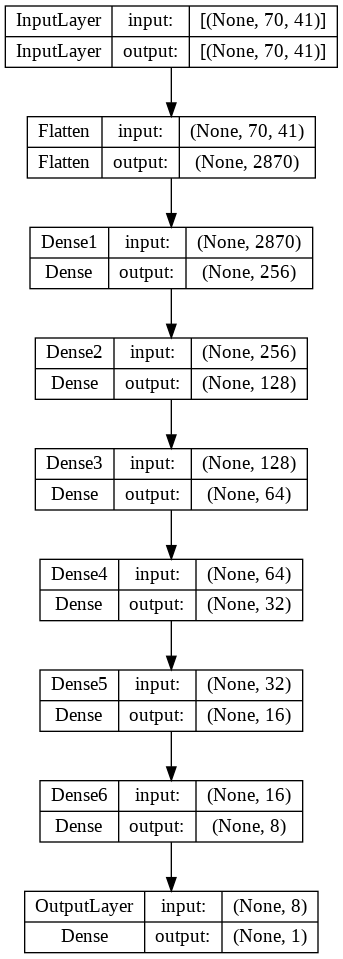

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(func_model, show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = EarlyStopping(monitor='val_auroc', mode='max', patience=12, verbose=1)
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_auroc', verbose=1, mode='max', save_best_only=True)

func_model_history = func_model.fit(train_X_3d, train_y_3d, epochs=20, batch_size=50, validation_data=(valid_X_3d, valid_y_3d), verbose=1, callbacks=[checkpointer])
func_history = func_model_history.history

Epoch 1/20
110/113 [============================>.] - ETA: 0s - loss: 0.5492 - auroc: 0.8827
Epoch 1: val_auroc improved from -inf to 0.66747, saving model to /content/drive/MyDrive/최종프로젝트/model4/01-0.6675.hdf5
113/113 [==============================] - 3s 14ms/step - loss: 0.5442 - auroc: 0.8848 - val_loss: 0.5140 - val_auroc: 0.6675
Epoch 2/20
110/113 [============================>.] - ETA: 0s - loss: 0.2649 - auroc: 0.9470
Epoch 2: val_auroc did not improve from 0.66747
113/113 [==============================] - 1s 10ms/step - loss: 0.2645 - auroc: 0.9469 - val_loss: 0.3851 - val_auroc: 0.6598
Epoch 3/20
110/113 [============================>.] - ETA: 0s - loss: 0.2270 - auroc: 0.9502
Epoch 3: val_auroc improved from 0.66747 to 0.68469, saving model to /content/drive/MyDrive/최종프로젝트/model4/03-0.6847.hdf5
113/113 [==============================] - 1s 11ms/step - loss: 0.2260 - auroc: 0.9503 - val_loss: 0.3775 - val_auroc: 0.6847
Epoch 4/20
111/113 [====================

# **Light GBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

lgbm_model=LGBMClassifier(n_estimators=700)
lgbm_model.fit(train_X_over, train_y_over, early_stopping_rounds=100, eval_metric="auc", eval_set=(valid_X, valid_y), verbose=True)
lgbm_pred=lgbm_model.predict(test_X)


[1]	valid_0's binary_logloss: 0.676215	valid_0's auc: 0.654795
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.663157	valid_0's auc: 0.654038
[3]	valid_0's binary_logloss: 0.652128	valid_0's auc: 0.658145
[4]	valid_0's binary_logloss: 0.642454	valid_0's auc: 0.666981
[5]	valid_0's binary_logloss: 0.633427	valid_0's auc: 0.668535
[6]	valid_0's binary_logloss: 0.625944	valid_0's auc: 0.671313
[7]	valid_0's binary_logloss: 0.620676	valid_0's auc: 0.671568
[8]	valid_0's binary_logloss: 0.614111	valid_0's auc: 0.6759
[9]	valid_0's binary_logloss: 0.605807	valid_0's auc: 0.683623
[10]	valid_0's binary_logloss: 0.599538	valid_0's auc: 0.68175
[11]	valid_0's binary_logloss: 0.59406	valid_0's auc: 0.693127
[12]	valid_0's binary_logloss: 0.589579	valid_0's auc: 0.698772
[13]	valid_0's binary_logloss: 0.586328	valid_0's auc: 0.703835
[14]	valid_0's binary_logloss: 0.581241	valid_0's auc: 0.702023
[15]	valid_0's binary_logloss: 0.578138	valid_0's auc:

In [ ]:
# AUC
auc_score = roc_auc_score(test_y, lgbm_pred)
print(auc_score)

0.6005210306934444


In [ ]:
import lightgbm as lgb

train = lgb.Dataset(train_X_over, label=train_y_over)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, train, 100)

# AUC
auc = roc_auc_score(test_y, pred_y)
print(auc)

0.692148659530125


In [ ]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(train_X_over, train_y_over)
y_pred = lgb_clf.predict(test_X)
print(roc_auc_score(test_y, pred_y))

0.692148659530125


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm = LGBMClassifier(n_estimators=200)

params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1],
          'boosting': ['gbdt', 'rf']}

grid = GridSearchCV(lgbm, param_grid=params)
grid.fit(train_X_over, train_y_over, early_stopping_rounds=100, eval_metric='auc', eval_set=[(valid_X, valid_y)])

print("최적 파라미터: ", grid.best_params_)

lgbm_roc_score = roc_auc_score(test_y, grid.predict_proba(test_X)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[42]	valid_0's binary_logloss: 0.508432	valid_0's auc: 0.711063
[43]	valid_0's binary_logloss: 0.518504	valid_0's auc: 0.711445
[44]	valid_0's binary_logloss: 0.515091	valid_0's auc: 0.712606
[45]	valid_0's binary_logloss: 0.513139	valid_0's auc: 0.71354
[46]	valid_0's binary_logloss: 0.508894	valid_0's auc: 0.713522
[47]	valid_0's binary_logloss: 0.514551	valid_0's auc: 0.712628
[48]	valid_0's binary_logloss: 0.51266	valid_0's auc: 0.713296
[49]	valid_0's binary_logloss: 0.522858	valid_0's auc: 0.713531
[50]	valid_0's binary_logloss: 0.522404	valid_0's auc: 0.712782
[51]	valid_0's binary_logloss: 0.520439	valid_0's auc: 0.712658
[52]	valid_0's binary_logloss: 0.519489	valid_0's auc: 0.712113
[53]	valid_0's binary_logloss: 0.518293	valid_0's auc: 0.712037
[54]	valid_0's binary_logloss: 0.517625	valid_0's auc: 0.712383
[55]	valid_0's binary_logloss: 0.515676	valid_0's auc: 0.713638
[56]	valid_0's binary_logloss: 0.535702	valid_0's auc: 0.711779
[57]	v

> 최적 파라미터:  {'boosting': 'gbdt', 'max_depth': 15, 'min_child_samples': 40, 'subsample': 0.8}<br>
ROC AUC: 0.7124

In [ ]:
# 결과 적용
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8, min_child_samples=40, max_depth=15)
lgbm.fit(train_X_over, train_y_over, early_stopping_rounds=100, eval_metric='auc', eval_set=(valid_X, valid_y), verbose=True)
lgbm_pred = lgbm.predict_proba(test_X)[:, 1]
score = roc_auc_score(test_y, lgbm_pred, average='macro')
print("ROC AUC: {0:.4f}".format(score))

[1]	valid_0's binary_logloss: 0.674785	valid_0's auc: 0.642156
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.660305	valid_0's auc: 0.648674
[3]	valid_0's binary_logloss: 0.646994	valid_0's auc: 0.663842
[4]	valid_0's binary_logloss: 0.636197	valid_0's auc: 0.666316
[5]	valid_0's binary_logloss: 0.625947	valid_0's auc: 0.673028
[6]	valid_0's binary_logloss: 0.6176	valid_0's auc: 0.677527
[7]	valid_0's binary_logloss: 0.610675	valid_0's auc: 0.678516
[8]	valid_0's binary_logloss: 0.604576	valid_0's auc: 0.681003
[9]	valid_0's binary_logloss: 0.598478	valid_0's auc: 0.686495
[10]	valid_0's binary_logloss: 0.592343	valid_0's auc: 0.689099
[11]	valid_0's binary_logloss: 0.585816	valid_0's auc: 0.691138
[12]	valid_0's binary_logloss: 0.579802	valid_0's auc: 0.694087
[13]	valid_0's binary_logloss: 0.576888	valid_0's auc: 0.695065
[14]	valid_0's binary_logloss: 0.572565	valid_0's auc: 0.698846
[15]	valid_0's binary_logloss: 0.567044	valid_0's au

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('LGBMClassifier')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
lgbm_clf.fit(train_X_over, train_y_over)
lgbm_pred = lgbm_clf.predict(test_X)
lgbm_pred_proba = lgbm_clf.predict_proba(test_X)[:,1]
print('roc auc score :', roc_auc_score(test_y, lgbm_pred_proba))

# **AUROC**

In [ ]:
# save model
model.save('/content/drive/MyDrive/최종프로젝트/model4/ann_model.h5')

rnn1_model.save('/content/drive/MyDrive/최종프로젝트/model4/rnn1_model.h5')
lstm1_model.save('/content/drive/MyDrive/최종프로젝트/model4/lstm1_model.h5')
gru1_model.save('/content/drive/MyDrive/최종프로젝트/model4/gru1_model.h5')

rnn2_model.save('/content/drive/MyDrive/최종프로젝트/model4/rnn2_model.h5')
lstm2_model.save('/content/drive/MyDrive/최종프로젝트/model4/lstm2_model.h5')
gru2_model.save('/content/drive/MyDrive/최종프로젝트/model4/gru2_model.h5')

cnn1_model.save('/content/drive/MyDrive/최종프로젝트/model4/cnn1_model.h5')
cnn2_model.save('/content/drive/MyDrive/최종프로젝트/model4/cnn2_model.h5')
cnn3_model.save('/content/drive/MyDrive/최종프로젝트/model4/cnn3_model.h5')
cnn4_model.save('/content/drive/MyDrive/최종프로젝트/model4/cnn4_model.h5')

func_model.save('/content/drive/MyDrive/최종프로젝트/model4/func_model.h5')

# import joblib

# joblib.dump(lgbm,'/content/drive/MyDrive/최종프로젝트/model4/lgbm_model.pkl')

In [ ]:
# load model
from keras.models import load_model
loaded_ann_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/ann-12-0.7865.hdf5')

loaded_rnn1_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/rnn1-07-0.7463.hdf5')
loaded_lstm1_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/lstm1-20-0.7724.hdf5')
loaded_gru1_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/gru1-20-0.7692.hdf5-')

loaded_rnn2_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/rnn2-15-0.7486.hdf5')
loaded_lstm2_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/lstm2-16-0.7536.hdf5')
loaded_gru2_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/gru2-20-0.7691.hdf5')

loaded_cnn1_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/cnn1-18-0.7774.hdf5')
loaded_cnn2_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/cnn2-17-0.8021.hdf5')
loaded_cnn3_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/cnn3-11-0.8026.hdf5')
loaded_cnn4_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/cnn4-17-0.7869.hdf5')

loaded_func_model = load_model('/content/drive/MyDrive/최종프로젝트/model4/func-19-0.7732.hdf5')

# loaded_lgbm_model = joblib.load('/content/drive/MyDrive/최종프로젝트/model3/lgbm_model.pkl')

In [ ]:
# model score
ann_model_score = model.evaluate(test_X_3d, test_y_3d)

rnn1_model_score = rnn1_model.evaluate(test_X_3d, test_y_3d)
lstm1_model_score = lstm1_model.evaluate(test_X_3d, test_y_3d)
gru1_model_score = gru1_model.evaluate(test_X_3d, test_y_3d)

rnn2_model_score = rnn2_model.evaluate(test_X_3d, test_y_3d)
lstm2_model_score = lstm2_model.evaluate(test_X_3d, test_y_3d)
gru2_model_score = gru2_model.evaluate(test_X_3d, test_y_3d)

cnn1_model_score = cnn1_model.evaluate(test_X_3d, test_y_3d)
cnn2_model_score = cnn2_model.evaluate(test_X_3d, test_y_3d)
cnn3_model_score = cnn3_model.evaluate(test_X_3d, test_y_3d)
cnn4_model_score = cnn4_model.evaluate(test_X_3d, test_y_3d)

func_model_score = func_model.evaluate(test_X_3d, test_y_3d)

# lgbm_model_score = lgbm.score(test_X, test_y)

13/13 [==============================] - 0s 5ms/step - loss: 0.3378 - auroc: 0.7516


In [ ]:
# loaded_model score
loaded_ann_model_score = loaded_ann_model.evaluate(test_X_3d, test_y_3d)

loaded_rnn1_model_score = loaded_rnn1_model.evaluate(test_X_3d, test_y_3d)
loaded_lstm1_model_score = loaded_lstm1_model.evaluate(test_X_3d, test_y_3d)
loaded_gru1_model_score = loaded_gru1_model.evaluate(test_X_3d, test_y_3d)

loaded_rnn2_model_score = loaded_rnn2_model.evaluate(test_X_3d, test_y_3d)
loaded_lstm2_model_score = loaded_lstm2_model.evaluate(test_X_3d, test_y_3d)
loaded_gru2_model_score = loaded_gru2_model.evaluate(test_X_3d, test_y_3d)

loaded_cnn1_model_score = loaded_cnn1_model.evaluate(test_X_3d, test_y_3d)
loaded_cnn2_model_score = loaded_cnn2_model.evaluate(test_X_3d, test_y_3d)
loaded_cnn3_model_score = loaded_cnn3_model.evaluate(test_X_3d, test_y_3d)
loaded_cnn4_model_score = loaded_cnn4_model.evaluate(test_X_3d, test_y_3d)

loaded_func_model_score = loaded_func_model.evaluate(test_X_3d, test_y_3d)

# loaded_lgbm_model_score = loaded_lgbm_model.score(test_X, test_y)

13/13 [==============================] - 1s 10ms/step - loss: 0.3596 - auroc: 0.7802


In [ ]:
# predict
ann_pred = model.predict(test_X_3d)

rnn1_pred = rnn1_model.predict(test_X_3d)
lstm1_pred = lstm1_model.predict(test_X_3d)
gru1_pred = gru1_model.predict(test_X_3d)

rnn2_pred = rnn2_model.predict(test_X_3d)
lstm2_pred = lstm2_model.predict(test_X_3d)
gru2_pred = gru2_model.predict(test_X_3d)

cnn1_pred = cnn1_model.predict(test_X_3d)
cnn2_pred = cnn2_model.predict(test_X_3d)
cnn3_pred = cnn3_model.predict(test_X_3d)
cnn4_pred = cnn4_model.predict(test_X_3d)

func_pred = func_model.predict(test_X_3d)

# lgbm_pred = lgbm.predict_proba(test_X)[:, 1]

13/13 [==============================] - 0s 3ms/step


In [ ]:
# loaded_model predict
loaded_ann_pred = loaded_ann_model.predict(test_X_3d)

loaded_rnn1_pred = loaded_rnn1_model.predict(test_X_3d)
loaded_lstm1_pred = loaded_lstm1_model.predict(test_X_3d)
loaded_gru1_pred = loaded_gru1_model.predict(test_X_3d)

loaded_rnn2_pred = loaded_rnn2_model.predict(test_X_3d)
loaded_lstm2_pred = loaded_lstm2_model.predict(test_X_3d)
loaded_gru2_pred = loaded_gru2_model.predict(test_X_3d)

loaded_cnn1_pred = loaded_cnn1_model.predict(test_X_3d)
loaded_cnn2_pred = loaded_cnn2_model.predict(test_X_3d)
loaded_cnn3_pred = loaded_cnn3_model.predict(test_X_3d)
loaded_cnn4_pred = loaded_cnn4_model.predict(test_X_3d)

loaded_func_pred = loaded_func_model.predict(test_X_3d)

# loaded_lgbm_pred = loaded_lgbm_model.predict_proba(test_X)[:, 1]

13/13 [==============================] - 0s 3ms/step


In [ ]:
# score 
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report, accuracy_score, roc_auc_score, average_precision_score

In [ ]:
# ANN
ann_fpr, ann_tpr, ann_thresholds = roc_curve(test_y_3d, ann_pred)
ann_roc_auc = roc_auc_score(test_y_3d, ann_pred)

# RNN
rnn1_fpr, rnn1_tpr, rnn1_thresholds = roc_curve(test_y_3d, rnn1_pred)
rnn1_roc_auc = roc_auc_score(test_y_3d, rnn1_pred)

rnn2_fpr, rnn2_tpr, rnn2_thresholds = roc_curve(test_y_3d, rnn2_pred)
rnn2_roc_auc = roc_auc_score(test_y_3d, rnn2_pred)

# LSTM
lstm1_fpr, lstm1_tpr, lstm1_thresholds = roc_curve(test_y_3d, lstm1_pred)
lstm1_roc_auc = roc_auc_score(test_y_3d, lstm1_pred)

lstm2_fpr, lstm2_tpr, lstm2_thresholds = roc_curve(test_y_3d, lstm2_pred)
lstm2_roc_auc = roc_auc_score(test_y_3d, lstm2_pred)

# GRU
gru1_fpr, gru1_tpr, gru1_thresholds = roc_curve(test_y_3d, gru1_pred)
gru1_roc_auc = roc_auc_score(test_y_3d, gru1_pred)

gru2_fpr, gru2_tpr, gru2_thresholds = roc_curve(test_y_3d, gru2_pred)
gru2_roc_auc = roc_auc_score(test_y_3d, gru2_pred)

# CNN
cnn1_fpr, cnn1_tpr, cnn1_thresholds = roc_curve(test_y_3d, cnn1_pred)
cnn1_roc_auc = roc_auc_score(test_y_3d, cnn1_pred)

cnn2_fpr, cnn2_tpr, cnn2_thresholds = roc_curve(test_y_3d, cnn2_pred)
cnn2_roc_auc = roc_auc_score(test_y_3d, cnn2_pred)

cnn3_fpr, cnn3_tpr, cnn3_thresholds = roc_curve(test_y_3d, cnn3_pred)
cnn3_roc_auc = roc_auc_score(test_y_3d, cnn3_pred)

cnn4_fpr, cnn4_tpr, cnn4_thresholds = roc_curve(test_y_3d, cnn4_pred)
cnn4_roc_auc = roc_auc_score(test_y_3d, cnn4_pred)

# Func api
func_fpr, func_tpr, func_thresholds = roc_curve(test_y_3d, func_pred)
func_roc_auc = roc_auc_score(test_y_3d, func_pred)

# LGBM
lgbm_fpr, lgbm_tpr, lgbm_thresholds = roc_curve(test_y, lgbm_pred)
lgbm_roc_auc = roc_auc_score(test_y, lgbm_pred)

In [ ]:
# loaded
# ANN
loaded_ann_fpr, loaded_ann_tpr, loaded_ann_thresholds = roc_curve(test_y_3d, loaded_ann_pred)
loaded_ann_roc_auc = roc_auc_score(test_y_3d, loaded_ann_pred)

# RNN
loaded_rnn1_fpr, loaded_rnn1_tpr, loaded_rnn1_thresholds = roc_curve(test_y_3d, loaded_rnn1_pred)
loaded_rnn1_roc_auc = roc_auc_score(test_y_3d, loaded_rnn1_pred)

loaded_rnn2_fpr, loaded_rnn2_tpr, loaded_rnn2_thresholds = roc_curve(test_y_3d, loaded_rnn2_pred)
loaded_rnn2_roc_auc = roc_auc_score(test_y_3d, loaded_rnn2_pred)

# LSTM
loaded_lstm1_fpr, loaded_lstm1_tpr, loaded_lstm1_thresholds = roc_curve(test_y_3d, loaded_lstm1_pred)
loaded_lstm1_roc_auc = roc_auc_score(test_y_3d, loaded_lstm1_pred)

loaded_lstm2_fpr, loaded_lstm2_tpr, loaded_lstm2_thresholds = roc_curve(test_y_3d, loaded_lstm2_pred)
loaded_lstm2_roc_auc = roc_auc_score(test_y_3d, loaded_lstm2_pred)

# GRU
loaded_gru1_fpr, loaded_gru1_tpr, loaded_gru1_thresholds = roc_curve(test_y_3d, loaded_gru1_pred)
loaded_gru1_roc_auc = roc_auc_score(test_y_3d, loaded_gru1_pred)

loaded_gru2_fpr, loaded_gru2_tpr, loaded_gru2_thresholds = roc_curve(test_y_3d, loaded_gru2_pred)
loaded_gru2_roc_auc = roc_auc_score(test_y_3d, loaded_gru2_pred)

# CNN
loaded_cnn1_fpr, loaded_cnn1_tpr, loaded_cnn1_thresholds = roc_curve(test_y_3d, loaded_cnn1_pred)
loaded_cnn1_roc_auc = roc_auc_score(test_y_3d, loaded_cnn1_pred)

loaded_cnn2_fpr, loaded_cnn2_tpr, loaded_cnn2_thresholds = roc_curve(test_y_3d, loaded_cnn2_pred)
loaded_cnn2_roc_auc = roc_auc_score(test_y_3d, loaded_cnn2_pred)

loaded_cnn3_fpr, loaded_cnn3_tpr, loaded_cnn3_thresholds = roc_curve(test_y_3d, loaded_cnn3_pred)
loaded_cnn3_roc_auc = roc_auc_score(test_y_3d, loaded_cnn3_pred)

loaded_cnn4_fpr, loaded_cnn4_tpr, loaded_cnn4_thresholds = roc_curve(test_y_3d, loaded_cnn4_pred)
loaded_cnn4_roc_auc = roc_auc_score(test_y_3d, loaded_cnn4_pred)

# Func api
# loaded_func_fpr, loaded_func_tpr, loaded_func_thresholds = roc_curve(test_y_3d, loaded_func_pred)
# loaded_func_roc_auc = roc_auc_score(test_y_3d, loaded_func_pred)

# LGBM
# loaded_lgbm_fpr, loaded_lgbm_tpr, loaded_lgbm_thresholds = roc_curve(test_y, loaded_lgbm_pred)
# loaded_lgbm_roc_auc = roc_auc_score(test_y_3d, loaded_lgbm_pred)

In [ ]:
print('ANN_ROC AUC Score: ', roc_auc_score(test_y_3d, ann_pred))
print()
print('RNN1_ROC AUC Score: ', roc_auc_score(test_y_3d, rnn1_pred))
print('LSTM1_ROC AUC Score: ', roc_auc_score(test_y_3d, lstm1_pred))
print('GRU1_ROC AUC Score: ', roc_auc_score(test_y_3d, gru1_pred))
print()
print('RNN2_ROC AUC Score: ', roc_auc_score(test_y_3d, rnn2_pred))
print('LSTM2_ROC AUC Score: ', roc_auc_score(test_y_3d, lstm2_pred))
print('GRU2_ROC AUC Score: ', roc_auc_score(test_y_3d, gru2_pred))
print()
print('CNN1_ROC AUC Score: ', roc_auc_score(test_y_3d, cnn1_pred))
print('CNN2_ROC AUC Score: ', roc_auc_score(test_y_3d, cnn2_pred))
print('CNN3_ROC AUC Score: ', roc_auc_score(test_y_3d, cnn3_pred))
print('CNN4_ROC AUC Score: ', roc_auc_score(test_y_3d, cnn4_pred))
print()
print('Func_ROC AUC Score: ', roc_auc_score(test_y_3d, func_pred))
print()
# print('LGBM_ROC AUC Score: ', roc_auc_score(test_y, lgbm_pred))

ANN_ROC AUC Score:  0.7664677276746242

RNN1_ROC AUC Score:  0.7218169761273209
LSTM1_ROC AUC Score:  0.7280614500442087
GRU1_ROC AUC Score:  0.7556366047745358

RNN2_ROC AUC Score:  0.6804818744473916
LSTM2_ROC AUC Score:  0.717948717948718
GRU2_ROC AUC Score:  0.7403846153846153

CNN1_ROC AUC Score:  0.7172855879752431
CNN2_ROC AUC Score:  0.7582338638373121
CNN3_ROC AUC Score:  0.7760278514588859
CNN4_ROC AUC Score:  0.7824381078691424

Func_ROC AUC Score:  0.7203801945181255



In [ ]:
print('ANN_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_ann_pred))
print()
print('RNN1_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_rnn1_pred))
print('LSTM1_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_lstm1_pred))
print('GRU1_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_gru1_pred))
print()
print('RNN2_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_rnn2_pred))
print('LSTM2_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_lstm2_pred))
print('GRU2_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_gru2_pred))
print()
print('CNN1_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_cnn1_pred))
print('CNN2_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_cnn2_pred))
print('CNN3_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_cnn3_pred))
print('CNN4_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_cnn4_pred))
print()
print('Func_ROC AUC Score: ', roc_auc_score(test_y_3d, loaded_func_pred))
print()
# print('LGBM_ROC AUC Score: ', roc_auc_score(test_y, loaded_lgbm_pred))

ANN_ROC AUC Score:  0.7485079575596817

RNN1_ROC AUC Score:  0.7234748010610079
LSTM1_ROC AUC Score:  0.7280614500442087
GRU1_ROC AUC Score:  0.7556366047745358

RNN2_ROC AUC Score:  0.711814765694076
LSTM2_ROC AUC Score:  0.7046308576480991
GRU2_ROC AUC Score:  0.7403846153846153

CNN1_ROC AUC Score:  0.7322612732095491
CNN2_ROC AUC Score:  0.7674071618037135
CNN3_ROC AUC Score:  0.7729332449160036
CNN4_ROC AUC Score:  0.7949270557029178

Func_ROC AUC Score:  0.7311560565870912



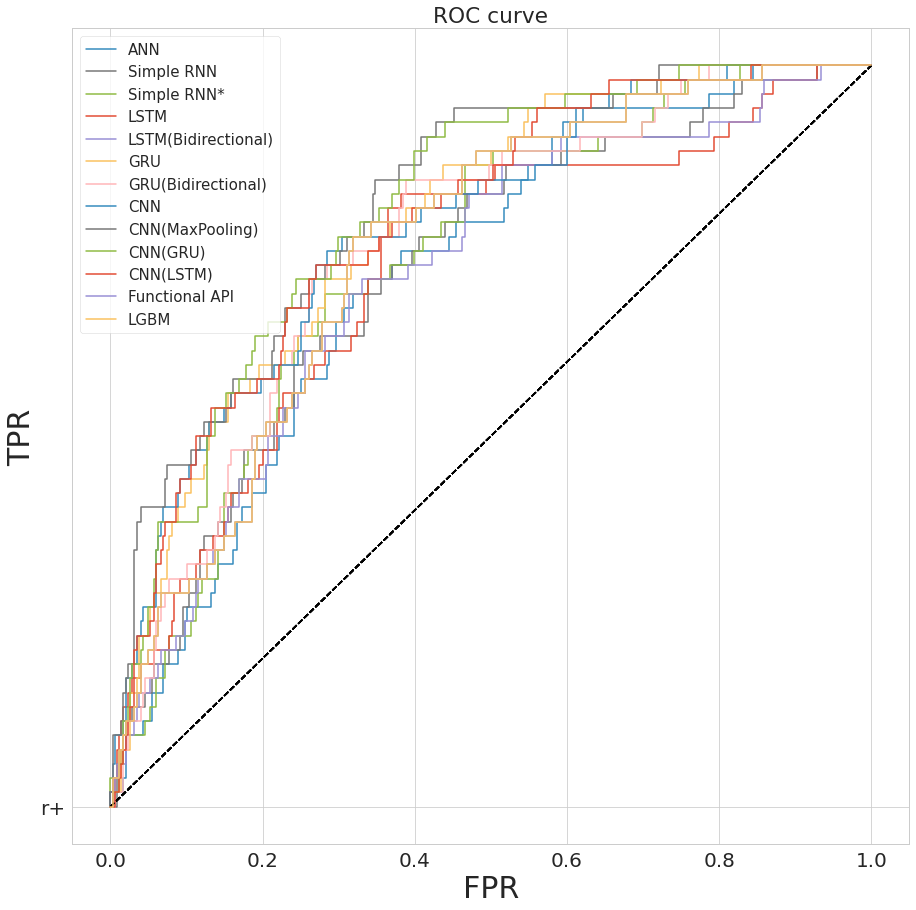

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(15,15))

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

loaded_ann_fpr, loaded_ann_tpr, loaded_ann_thresholds = roc_curve(test_y_3d, loaded_ann_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_ann_fpr, loaded_ann_tpr, label='ANN')

loaded_rnn1_fpr, loaded_rnn1_tpr, loaded_rnn1_thresholds = roc_curve(test_y_3d, loaded_rnn1_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_rnn1_fpr, loaded_rnn1_tpr, label='Simple RNN')

loaded_rnn2_fpr, loaded_rnn2_tpr, loaded_rnn2_thresholds = roc_curve(test_y_3d, loaded_rnn2_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_rnn2_fpr, loaded_rnn2_tpr, label='Simple RNN*')

loaded_lstm1_fpr, loaded_lstm1_tpr, loaded_lstm1_thresholds = roc_curve(test_y_3d, loaded_lstm1_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_lstm1_fpr, loaded_lstm1_tpr, label='LSTM')

loaded_lstm2_fpr, loaded_lstm2_tpr, loaded_lstm2_thresholds = roc_curve(test_y_3d, loaded_lstm2_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_lstm2_fpr, loaded_lstm2_tpr, label='LSTM(Bidirectional)')

loaded_gru1_fpr, loaded_gru1_tpr, loaded_gru1_thresholds = roc_curve(test_y_3d, loaded_gru1_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_gru1_fpr, loaded_gru1_tpr, label='GRU')

loaded_gru2_fpr, loaded_gru2_tpr, loaded_gru2_thresholds = roc_curve(test_y_3d, loaded_gru2_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_gru2_fpr, loaded_gru2_tpr, label='GRU(Bidirectional)')

loaded_cnn1_fpr, loaded_cnn1_tpr, loaded_cnn1_thresholds = roc_curve(test_y_3d, loaded_cnn1_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_cnn1_fpr, loaded_cnn1_tpr, label='CNN')

loaded_cnn2_fpr, loaded_cnn2_tpr, loaded_cnn2_thresholds = roc_curve(test_y_3d, loaded_cnn2_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(loaded_cnn2_fpr, loaded_cnn2_tpr, label='CNN(MaxPooling)')

cnn3_fpr, cnn3_tpr, cnn3_thresholds = roc_curve(test_y_3d, cnn3_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(cnn3_fpr, cnn3_tpr, label='CNN(GRU)')

cnn4_fpr, cnn4_tpr, cnn4_thresholds = roc_curve(test_y_3d, cnn4_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(cnn4_fpr, cnn4_tpr, label='CNN(LSTM)')

func_fpr, func_tpr, func_thresholds = roc_curve(test_y_3d, func_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(func_fpr, func_tpr, label='Functional API')

lgbm_fpr, lgbm_tpr, lgbm_thresholds = roc_curve(test_y, lgbm_pred)
plt.plot([0,1], [0,1], "k--", "r+")
plt.plot(func_fpr, func_tpr, label='LGBM')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='upper left')
plt.title('ROC curve')
plt.show()


In [ ]:
# F_positive_rate, T_positive_rate 구하기
ocsvmF_positive_rate, ocsvmT_positive_rate, ocsvm_thresholds =roc_curve(pred_ocsvm, y_test)
isfF_positive_rate, isfT_positive_rate, isv_thresholds =roc_curve(pred_isf, y_test)
xgF_positive_rate, xgT_positive_rate, xg_thresholds =roc_curve(pred_xg, y_test)
 
#roc_auc
ocsvm_roc_auc = auc(ocsvmF_positive_rate, ocsvmT_positive_rate)
isf_roc_auc = auc(isfF_positive_rate, isfT_positive_rate)
xg_roc_auc = auc(xgF_positive_rate, xgT_positive_rate)
 
plt.step(ocsvmF_positive_rate, ocsvmT_positive_rate, color='blue', lw=2)
plt.step(isfF_positive_rate, isfT_positive_rate, color='red', lw=2)
plt.step(xgF_positive_rate, xgT_positive_rate, color='green', lw=2)
 
plt.legend(['ocsvm','isf','xg'])
plt.show()

# **DF 만들기**

In [ ]:
df = pd.DataFrame(ann_pred, columns=['ann_pred'])
df['rnn1_pred'] = loaded_rnn1_pred
df['rnn2_pred'] = loaded_rnn2_pred
df['lstm1_pred'] = loaded_lstm1_pred
df['lstm2_pred'] = lstm2_pred
df['gru1_pred'] = loaded_gru1_pred
df['gru2_pred'] = loaded_gru2_pred
df['cnn1_pred'] = loaded_cnn1_pred
df['cnn2_pred'] = loaded_cnn2_pred
df['cnn3_pred'] = cnn3_pred
df['cnn4_pred'] = loaded_cnn4_pred
df['func_pred'] = loaded_func_pred
df['label'] = l
df

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/최종프로젝트/missing_values_test_data.csv')
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0      135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
1      135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
2      135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
3      135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
4      135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
...       ...   ...     ...      ...   ...   ...   ...      ...   ...   
29549  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
29550  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
29551  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
29552  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
29553  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  11.0   

       Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0            0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
1            0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
2            0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
3            0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
4            0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
...          ...          ...         ...   ...   ...      ...   ...   ...   
29549        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
29550        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
29551        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
29552        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
29553        0.8        143.5         1.2   0.5  14.0    101.0  23.0  26.6   

          HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR  SPO2  \
0       86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
1       86.0  4.0      2.9  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
2      130.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  28.0  97.0   
3      130.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  22.0  97.0   
4      123.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  23.0  97.0   
...      ...  ...      ...  ...    ...    ...    ...        ...   ...   ...   
29549   59.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0   
29550   60.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  22.0  98.0   
29551   66.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  18.0  98.0   
29552   66.0  4.0      2.0  2.0  139.0   40.0   90.0      170.5  18.0  98.0   
29553   66.0  4.0      2.0  1.8  133.0   40.0  118.0      118.0  18.0  98.0   

         BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0      37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
1      37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
2      38.7        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
3      38.7        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
4      38.7        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
...     ...        ...        ...    ...   ...   ...       ...    ...   ...   
29549  37.6        2.6       0.18   35.0  11.0  7.38       1.0  134.0  51.0   
29550  37.6        2.6       0.18   75.0  11.0  7.38       1.0  132.0  50.0   
29551  37.7        2.6       0.18   45.0  11.0  7.38       1.0  139.0  54.0   
29552  37.7        2.6       0.18   75.0  11.0  7.37       1.0  139.0  54.0   
29553  37.7        2.6       0.18   75.0  10.6  7.38       1.0  139.0  54.0   

        MBP  LOS  label  
0      77.0    6      0  
1      77.0    6      0  
2      77.0    6      0  
3      77.0    6      0  
4      77.0    6      0  
...     ...  ...    ...  
29549  79.0    9      0  
29550  78.0    9      0  
29551  84.0    9      0  
29552  84.0    9      0  
29553  84.0 

In [ ]:
# 입력 첫번째 값
first_record = test_df.drop_duplicates(subset='pid',keep='first')
first_record = first_record.reset_index(drop=True)

In [ ]:
# 입력 마지막 값
last_record = test_df.drop_duplicates(subset='pid',keep='last')
last_record = last_record.reset_index(drop=True)

In [ ]:
# pid 별 묶어서 평균
mean_record = test_df.groupby('pid').mean().reset_index()

In [ ]:
first_record.to_csv('/content/drive/MyDrive/최종프로젝트/pid_first_rec.csv')
last_record.to_csv('/content/drive/MyDrive/최종프로젝트/pid_last_rec.csv')
mean_record.to_csv('/content/drive/MyDrive/최종프로젝트/pid_mean_rec.csv')

In [ ]:
eda_df = pd.read_csv('/content/drive/MyDrive/최종프로젝트/EDA_data.csv')
eda_df.drop(['Unnamed: 0'], axis=1, inplace=True)
eda_df

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0    135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
1    142245  86.0     1.0      2.0  85.0  45.0  72.0      2.9  20.0   
2    137989  63.0     0.0      3.0  85.0  45.0  72.0      2.9  20.0   
3    142184  74.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
4    134318  48.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
..      ...   ...     ...      ...   ...   ...   ...      ...   ...   
395  139907  39.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
396  136230  75.0     1.0      1.0  85.0  45.0  72.0      2.9  20.0   
397  139358  71.0     1.0      4.0  85.0  45.0  72.0      2.9  20.0   
398  137755  81.0     0.0      2.0  85.0  45.0  72.0      2.9  20.0   
399  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   

     Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
1          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
2          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
3          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
4          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
..         ...          ...         ...   ...   ...      ...   ...   ...   
395        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
396        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
397        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
398        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
399        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   

       HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR  SPO2  \
0    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
1    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
2    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
3    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
4    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
..    ...  ...      ...  ...    ...    ...    ...        ...   ...   ...   
395  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
396  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
397  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
398  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
399  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   

       BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
1    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
2    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
3    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
4    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
..    ...        ...        ...    ...   ...   ...       ...    ...   ...   
395  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
396  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
397  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
398  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
399  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   

      MBP  LOS  ann_pred  rnn1_pred  rnn2_pred  lstm1_pred  lstm2_pred  \
0    77.0    6  0.099120   0.112077   0.204672    0.171169    0.235913   
1    77.0    7  0.005208   0.034686   0.008110    0.077271    0.062219   
2    77.0   47  0.156299   0.057729   0.166422    0.097842    0.120842   
3    77.0   37  0.073247   0.183097   0.198213    0.098188    0.244136   
4    77.0   14  0.011111   0.04176

In [ ]:
pred_df = eda_df[['ann_pred', 'rnn1_pred', 'rnn2_pred', 'lstm1_pred', 'lstm2_pred', 'gru1_pred', 'gru2_pred', 'cnn1_pred', 'cnn2_pred', 'cnn3_pred', 'cnn4_pred', 'func_pred', 'label']]
pred_df

ann_pred  rnn1_pred  rnn2_pred  lstm1_pred  lstm2_pred  gru1_pred  \
0    0.099120   0.112077   0.204672    0.171169    0.235913   0.150944   
1    0.005208   0.034686   0.008110    0.077271    0.062219   0.937243   
2    0.156299   0.057729   0.166422    0.097842    0.120842   0.105919   
3    0.073247   0.183097   0.198213    0.098188    0.244136   0.179208   
4    0.011111   0.041765   0.081276    0.045393    0.044053   0.058858   
..        ...        ...        ...         ...         ...        ...   
395  0.079771   0.097366   0.172374    0.046639    0.159426   0.141626   
396  0.051257   0.033623   0.115285    0.037716    0.214024   0.067754   
397  0.112227   0.086915   0.188699    0.057281    0.220872   0.086642   
398  0.019229   0.037743   0.051160    0.037147    0.076601   0.071705   
399  0.011640   0.035305   0.186048    0.040327    0.082367   0.068708   

     gru2_pred  cnn1_pred  cnn2_pred  cnn3_pred  cnn4_pred  func_pred  label  
0     0.174046   0.322181   0.056866   0.119137   0.364216   0.200010      0  
1     0.104222   0.111010   0.049072   0.031105   0.041848   0.075994      0  
2     0.090831   0.116229   0.035898   0.108247   0.148067   0.122211      0  
3     0.177917   0.152520   0.028672   0.129102   0.256332   0.163652      0  
4     0.070369   0.078450   0.006324   0.022714   0.095606   0.053279      0  
..         ...        ...        ...        ...        ...        ...    ...  
395   0.141123   0.118544   0.042659   0.117666   0.206911   0.077982      0  
396   0.049910   0.149400   0.007528   0.025884   0.050034   0.057867      0  
397   0.182242   0.190067   0.022601   0.095566   0.171188   0.100311      1  
398   0.022302   0.060466   0.008726   0.054384   0.058619   0.030691      0  
399   0.031839   0.083111   0.017100   0.085523   0.066642   0.066818      0  

[400 rows x 13 columns]

In [ ]:
pred_df.to_csv('/content/drive/MyDrive/최종프로젝트/pred_data.csv')

In [ ]:
first_record = pd.read_csv('/content/drive/MyDrive/최종프로젝트/pid_first_rec.csv')
first_record.drop(['Unnamed: 0'], axis=1, inplace=True)

last_record = pd.read_csv('/content/drive/MyDrive/최종프로젝트/pid_last_rec.csv')
last_record.drop(['Unnamed: 0'], axis=1, inplace=True)

mean_record = pd.read_csv('/content/drive/MyDrive/최종프로젝트/pid_mean_rec.csv')
mean_record.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
pred_df = pd.read_csv('/content/drive/MyDrive/최종프로젝트/pred_data.csv')
pred_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
first_record.drop(['label'], axis=1, inplace=True)
last_record.drop(['label'], axis=1, inplace=True)
mean_record.drop(['label'], axis=1, inplace=True)

In [ ]:
pd.concat([first_record, pred_df], axis=1)

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0    135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
1    142245  86.0     1.0      2.0  85.0  45.0  72.0      2.9  20.0   
2    137989  63.0     0.0      3.0  85.0  45.0  72.0      2.9  20.0   
3    142184  74.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
4    134318  48.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
..      ...   ...     ...      ...   ...   ...   ...      ...   ...   
395  139907  39.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
396  136230  75.0     1.0      1.0  85.0  45.0  72.0      2.9  20.0   
397  139358  71.0     1.0      4.0  85.0  45.0  72.0      2.9  20.0   
398  137755  81.0     0.0      2.0  85.0  45.0  72.0      2.9  20.0   
399  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   

     Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
1          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
2          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
3          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
4          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
..         ...          ...         ...   ...   ...      ...   ...   ...   
395        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
396        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
397        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
398        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
399        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   

       HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR  SPO2  \
0    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
1    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
2    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
3    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
4    86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
..    ...  ...      ...  ...    ...    ...    ...        ...   ...   ...   
395  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
396  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
397  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
398  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   
399  86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0  97.0   

       BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
1    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
2    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
3    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
4    37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
..    ...        ...        ...    ...   ...   ...       ...    ...   ...   
395  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
396  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
397  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
398  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
399  37.1        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   

      MBP  LOS  ann_pred  rnn1_pred  rnn2_pred  lstm1_pred  lstm2_pred  \
0    77.0    6  0.099120   0.112077   0.204672    0.171169    0.235913   
1    77.0    7  0.005208   0.034686   0.008110    0.077271    0.062219   
2    77.0   47  0.156299   0.057729   0.166422    0.097842    0.120842   
3    77.0   37  0.073247   0.183097   0.198213    0.098188    0.244136   
4    77.0   14  0.011111   0.04176

In [ ]:
first_df = pd.concat([first_record, pred_df], axis=1)
last_df = pd.concat([last_record, pred_df], axis=1)
mean_df = pd.concat([mean_record, pred_df], axis=1)

In [ ]:
first_df.to_csv('/content/drive/MyDrive/최종프로젝트/EDA_data_first.csv')
last_df.to_csv('/content/drive/MyDrive/최종프로젝트/EDA_data_last.csv')
mean_df.to_csv('/content/drive/MyDrive/최종프로젝트/EDA_data_mean.csv')

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve

plt.figure(figsize=(15,15))

plt.rc('font', size=15)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기

for i in new_df.columns:
    fpr, tpr, thresholds = roc_curve(test_y, new_df[new_df[i]])
    plt.plot([0,1], [0,1], "k--", "r+")
    plt.plot(fpr, tpr, label=i)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='upper left')
plt.title('ROC curve')
plt.show()

# **데이터 탐색**

In [ ]:
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')

# display all columns
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/최종프로젝트/EDA_data_last.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

pid   age  Gender  ICUType   ALP   ALT   AST  Albumin   BUN  \
0    135089  90.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
1    142245  86.0     1.0      2.0  85.0  45.0  72.0      2.9  20.0   
2    137989  63.0     0.0      3.0  85.0  45.0  72.0      2.9  20.0   
3    142184  74.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
4    134318  48.0     1.0      3.0  85.0  45.0  72.0      2.9  20.0   
..      ...   ...     ...      ...   ...   ...   ...      ...   ...   
395  139907  39.0     0.0      4.0  85.0  45.0  72.0      2.9  20.0   
396  136230  75.0     1.0      1.0  85.0  45.0  72.0      2.9  20.0   
397  139358  71.0     1.0      4.0  85.0  45.0  72.0      2.9  20.0   
398  137755  81.0     0.0      2.0  85.0  45.0  72.0      2.9  20.0   
399  135219  78.0     0.0      4.0  85.0  45.0  72.0      2.9  11.0   

     Bilirubin  Cholesterol  Creatinine  FiO2   GCS  Glucose  HCO3   HCT  \
0          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
1          0.8        143.5         1.0   0.5  14.0    127.0  23.0  32.9   
2          0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
3          0.8        143.5         1.0   0.5  15.0    127.0  23.0  30.4   
4          0.8        143.5         1.0   0.5  15.0    127.0  23.0  30.4   
..         ...          ...         ...   ...   ...      ...   ...   ...   
395        0.8        143.5         1.0   0.5   7.0    127.0  23.0  30.4   
396        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
397        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
398        0.8        143.5         1.0   0.5  14.0    127.0  23.0  30.4   
399        0.8        143.5         1.2   0.5  14.0    101.0  23.0  26.6   

        HR    K  Lactate   Mg     Na  PaCO2   PaO2  Platelets    RR   SPO2  \
0    106.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  24.0   97.0   
1     86.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   96.0   
2    100.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   97.0   
3    104.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   99.0   
4     95.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  11.0   97.0   
..     ...  ...      ...  ...    ...    ...    ...        ...   ...    ...   
395  128.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   97.0   
396   85.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  15.0  100.0   
397   56.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   98.0   
398   61.0  4.0      2.0  2.0  139.0   40.0  118.0      170.5  19.0   98.0   
399   66.0  4.0      2.0  1.8  133.0   40.0  118.0      118.0  18.0   98.0   

       BT  TroponinI  TroponinT  Urine   WBC    pH  MechVent    SBP   DBP  \
0    35.6        2.6       0.18   70.0  11.0  7.38       1.0  119.0  62.0   
1    37.1        2.6       0.64   75.0  11.0  7.38       1.0  116.0  58.0   
2    36.6        2.6       0.18  240.0  11.0  7.38       1.0  116.0  58.0   
3    37.0        2.6       0.18  160.0  11.0  7.38       1.0  187.0  70.0   
4    36.9        2.6       0.18   75.0  11.0  7.38       1.0  116.0  66.0   
..    ...        ...        ...    ...   ...   ...       ...    ...   ...   
395  38.1        2.6       0.18  120.0  11.0  7.38       1.0   92.0  52.0   
396  37.2        2.6       0.18   75.0  11.0  7.38       1.0  116.0  58.0   
397  35.8        2.6       0.18  120.0  11.0  7.38       1.0  147.0  88.0   
398  37.3        2.6       0.18   45.0  11.0  7.38       1.0  129.0  55.0   
399  37.7        2.6       0.18   75.0  10.6  7.38       1.0  139.0  54.0   

       MBP  LOS  ann_pred  rnn1_pred  rnn2_pred  lstm1_pred  lstm2_pred  \
0     84.0    6  0.099120   0.112077   0.204672    0.171169    0.235913   
1     77.0    7  0.005208   0.034686   0.008110    0.077271    0.062219   
2     77.0   47  0.156299   0.057729   0.166422    0.097842    0.120842   
3    117.0   37  0.073247   0.183097   0.198213    0.098188    0.244136   
4    

In [ ]:
essential_df = data[['pid', 'age', 'Gender', 'ICUType', 'HR', 'RR', 'SPO2', 'BT', 'MechVent', 'SBP', 'DBP', 'MBP', 'LOS', 'label']]
essential_df

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
0    135089  90.0     1.0      3.0  106.0  24.0   97.0  35.6       1.0  119.0   
1    142245  86.0     1.0      2.0   86.0  19.0   96.0  37.1       1.0  116.0   
2    137989  63.0     0.0      3.0  100.0  19.0   97.0  36.6       1.0  116.0   
3    142184  74.0     0.0      4.0  104.0  19.0   99.0  37.0       1.0  187.0   
4    134318  48.0     1.0      3.0   95.0  11.0   97.0  36.9       1.0  116.0   
..      ...   ...     ...      ...    ...   ...    ...   ...       ...    ...   
395  139907  39.0     0.0      4.0  128.0  19.0   97.0  38.1       1.0   92.0   
396  136230  75.0     1.0      1.0   85.0  15.0  100.0  37.2       1.0  116.0   
397  139358  71.0     1.0      4.0   56.0  19.0   98.0  35.8       1.0  147.0   
398  137755  81.0     0.0      2.0   61.0  19.0   98.0  37.3       1.0  129.0   
399  135219  78.0     0.0      4.0   66.0  18.0   98.0  37.7       1.0  139.0   

      DBP    MBP  LOS  label  
0    62.0   84.0    6      0  
1    58.0   77.0    7      0  
2    58.0   77.0   47      0  
3    70.0  117.0   37      0  
4    66.0   81.0   14      0  
..    ...    ...  ...    ...  
395  52.0   64.0   84      0  
396  58.0   77.0    9      0  
397  88.0  112.0   28      1  
398  55.0   81.0   14      0  
399  54.0   84.0    9      0  

[400 rows x 14 columns]

In [ ]:
essential_df.corr()

pid       age    Gender   ICUType        HR        RR  \
pid       1.000000 -0.104622 -0.030632  0.007589  0.034345  0.095854   
age      -0.104622  1.000000 -0.025497 -0.177901 -0.140344  0.133745   
Gender   -0.030632 -0.025497  1.000000 -0.105113 -0.045981 -0.058561   
ICUType   0.007589 -0.177901 -0.105113  1.000000  0.022156 -0.013203   
HR        0.034345 -0.140344 -0.045981  0.022156  1.000000  0.077085   
RR        0.095854  0.133745 -0.058561 -0.013203  0.077085  1.000000   
SPO2     -0.010715  0.015855 -0.016173  0.041527 -0.007276  0.032945   
BT        0.069101 -0.144444  0.045272  0.059754  0.166979 -0.075833   
MechVent       NaN       NaN       NaN       NaN       NaN       NaN   
SBP       0.027664  0.089050  0.055293  0.113719 -0.051613  0.070471   
DBP      -0.019922 -0.100330  0.011654  0.023579  0.110856  0.050611   
MBP      -0.053434 -0.005235 -0.055210  0.064396  0.026621  0.037043   
LOS       0.042125 -0.036164 -0.003427  0.142396  0.108521 -0.050668   
label    -0.081406  0.173360  0.001504  0.037143  0.099927  0.085083   

              SPO2        BT  MechVent       SBP       DBP       MBP  \
pid      -0.010715  0.069101       NaN  0.027664 -0.019922 -0.053434   
age       0.015855 -0.144444       NaN  0.089050 -0.100330 -0.005235   
Gender   -0.016173  0.045272       NaN  0.055293  0.011654 -0.055210   
ICUType   0.041527  0.059754       NaN  0.113719  0.023579  0.064396   
HR       -0.007276  0.166979       NaN -0.051613  0.110856  0.026621   
RR        0.032945 -0.075833       NaN  0.070471  0.050611  0.037043   
SPO2      1.000000 -0.045985       NaN  0.069181  0.048863  0.107337   
BT       -0.045985  1.000000       NaN -0.048759 -0.030286 -0.073292   
MechVent       NaN       NaN       NaN       NaN       NaN       NaN   
SBP       0.069181 -0.048759       NaN  1.000000  0.613479  0.473294   
DBP       0.048863 -0.030286       NaN  0.613479  1.000000  0.599385   
MBP       0.107337 -0.073292       NaN  0.473294  0.599385  1.000000   
LOS      -0.025765  0.099803       NaN  0.036535  0.058203  0.040470   
label    -0.101582 -0.063442       NaN  0.014249  0.046545  0.117471   

               LOS     label  
pid       0.042125 -0.081406  
age      -0.036164  0.173360  
Gender   -0.003427  0.001504  
ICUType   0.142396  0.037143  
HR        0.108521  0.099927  
RR       -0.050668  0.085083  
SPO2     -0.025765 -0.101582  
BT        0.099803 -0.063442  
MechVent       NaN       NaN  
SBP       0.036535  0.014249  
DBP       0.058203  0.046545  
MBP       0.040470  0.117471  
LOS       1.000000 -0.015716  
label    -0.015716  1.000000

In [ ]:
data[['pid', 'age', 'Gender', 'ICUType', 'HR', 'RR', 'SPO2', 'BT', 'MechVent', 'SBP', 'DBP', 'MBP', 'LOS', 'ann_pred', 'rnn1_pred', 'lstm1_pred', 'gru1_pred', 'cnn4_pred', 'func_pred', 'label']].corr()

pid       age    Gender   ICUType        HR        RR  \
pid         1.000000 -0.104622 -0.030632  0.007589  0.034345  0.095854   
age        -0.104622  1.000000 -0.025497 -0.177901 -0.140344  0.133745   
Gender     -0.030632 -0.025497  1.000000 -0.105113 -0.045981 -0.058561   
ICUType     0.007589 -0.177901 -0.105113  1.000000  0.022156 -0.013203   
HR          0.034345 -0.140344 -0.045981  0.022156  1.000000  0.077085   
RR          0.095854  0.133745 -0.058561 -0.013203  0.077085  1.000000   
SPO2       -0.010715  0.015855 -0.016173  0.041527 -0.007276  0.032945   
BT          0.069101 -0.144444  0.045272  0.059754  0.166979 -0.075833   
MechVent         NaN       NaN       NaN       NaN       NaN       NaN   
SBP         0.027664  0.089050  0.055293  0.113719 -0.051613  0.070471   
DBP        -0.019922 -0.100330  0.011654  0.023579  0.110856  0.050611   
MBP        -0.053434 -0.005235 -0.055210  0.064396  0.026621  0.037043   
LOS         0.042125 -0.036164 -0.003427  0.142396  0.108521 -0.050668   
ann_pred   -0.045077  0.186164  0.017396  0.169880  0.116228  0.069515   
rnn1_pred  -0.060187  0.318395 -0.085660  0.271355  0.091218  0.028979   
lstm1_pred -0.107860  0.402185 -0.115851  0.257659  0.098811  0.028408   
gru1_pred   0.009169  0.179613 -0.165553  0.117455  0.084000  0.005998   
cnn4_pred  -0.068282  0.249906  0.103276  0.261916  0.150213 -0.030095   
func_pred  -0.078372  0.385826 -0.122282  0.348536  0.082083  0.017535   
label      -0.081406  0.173360  0.001504  0.037143  0.099927  0.085083   

                SPO2        BT  MechVent       SBP       DBP       MBP  \
pid        -0.010715  0.069101       NaN  0.027664 -0.019922 -0.053434   
age         0.015855 -0.144444       NaN  0.089050 -0.100330 -0.005235   
Gender     -0.016173  0.045272       NaN  0.055293  0.011654 -0.055210   
ICUType     0.041527  0.059754       NaN  0.113719  0.023579  0.064396   
HR         -0.007276  0.166979       NaN -0.051613  0.110856  0.026621   
RR          0.032945 -0.075833       NaN  0.070471  0.050611  0.037043   
SPO2        1.000000 -0.045985       NaN  0.069181  0.048863  0.107337   
BT         -0.045985  1.000000       NaN -0.048759 -0.030286 -0.073292   
MechVent         NaN       NaN       NaN       NaN       NaN       NaN   
SBP         0.069181 -0.048759       NaN  1.000000  0.613479  0.473294   
DBP         0.048863 -0.030286       NaN  0.613479  1.000000  0.599385   
MBP         0.107337 -0.073292       NaN  0.473294  0.599385  1.000000   
LOS        -0.025765  0.099803       NaN  0.036535  0.058203  0.040470   
ann_pred   -0.040072  0.055558       NaN -0.095931 -0.028317 -0.078902   
rnn1_pred   0.027176 -0.011975       NaN  0.051972  0.000275  0.049341   
lstm1_pred  0.009257 -0.100385       NaN  0.018100  0.025681  0.078803   
gru1_pred   0.045680  0.016546       NaN -0.033294 -0.047511 -0.032751   
cnn4_pred   0.044655  0.092664       NaN -0.065767 -0.054906 -0.035694   
func_pred   0.031729 -0.061258       NaN  0.024480 -0.025337  0.033701   
label      -0.101582 -0.063442       NaN  0.014249  0.046545  0.117471   

                 LOS  ann_pred  rnn1_pred  lstm1_pred  gru1_pred  cnn4_pred  \
pid         0.042125 -0.045077  -0.060187   -0.107860   0.009169  -0.068282   
age        -0.036164  0.186164   0.318395    0.402185   0.179613   0.249906   
Gender     -0.003427  0.017396  -0.085660   -0.115851  -0.165553   0.103276   
ICUType     0.142396  0.169880   0.271355    0.257659   0.117455   0.261916   
HR          0.108521  0.116228   0.091218    0.098811   0.084000   0.150213   
RR         -0.050668  0.069515   0.028979    0.028408   0.005998  -0.030095   
SPO2       -0.025765 -0.040072   0.027176    0.009257   0.045680   0.044655   
BT          0.099803  0.055558  -0.011975   -0.100385   0.016546   0.092664   
MechVent         NaN       NaN        NaN         NaN        NaN        NaN   
SBP         0.036535 -0.095931   0.051972    0.018100  -0.033294  -0.065767   
DBP         0.058203 -0.028317   0.000

> pred들이 **age**와 **ICUType** 과 연관성이 있어 보임

In [ ]:
import seaborn as sns

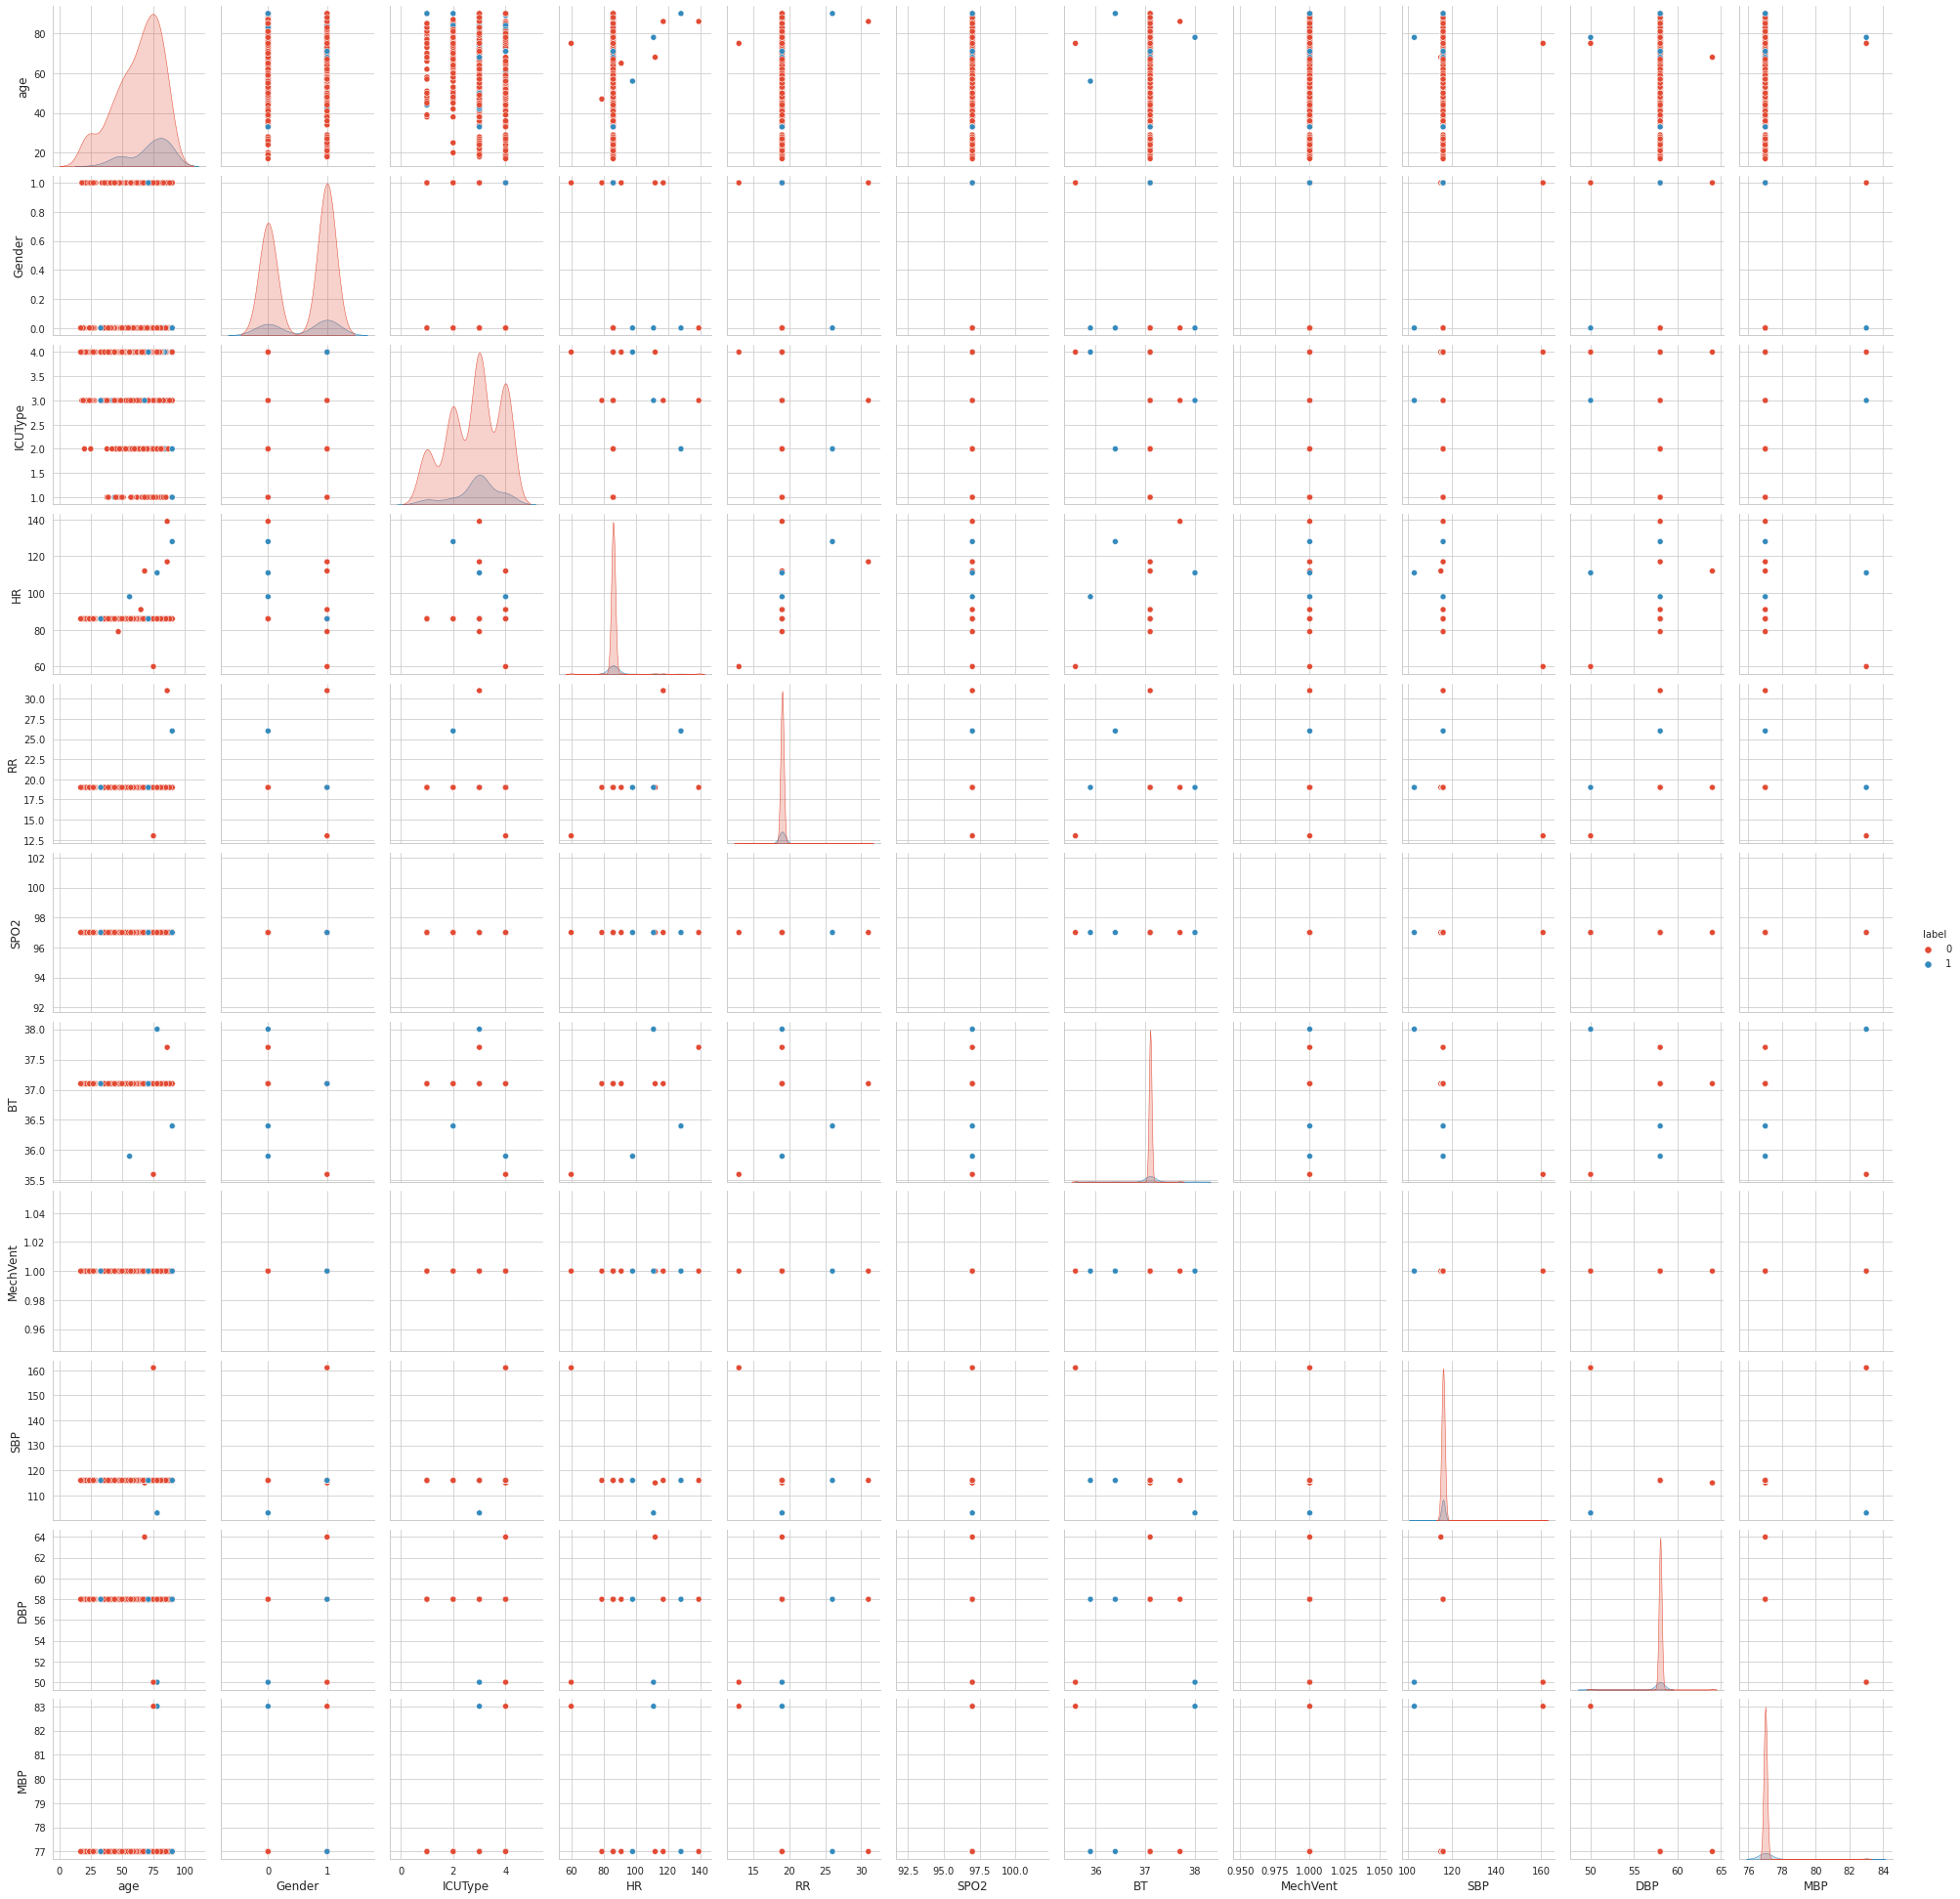

In [ ]:
fig = sns.pairplot(essential_df.drop(['pid'], axis=1), hue='label')

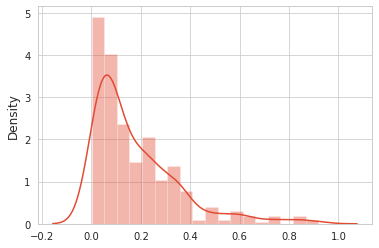

In [ ]:
sns.distplot(new_df['cnn4_pred'].values)

In [ ]:
loaded_cnn4_thresholds

array([1.9140958 , 0.91409576, 0.9033571 , 0.87988245, 0.8508601 ,
       0.8322059 , 0.83157665, 0.80392057, 0.77468324, 0.7596698 ,
       0.75643086, 0.7500442 , 0.73213404, 0.6440288 , 0.6057768 ,
       0.59466755, 0.5943301 , 0.5905735 , 0.5504732 , 0.5352285 ,
       0.53056043, 0.5294031 , 0.48554713, 0.48031643, 0.4597913 ,
       0.4588544 , 0.45214254, 0.44886717, 0.40875453, 0.4081141 ,
       0.39931548, 0.39856595, 0.39740843, 0.38558722, 0.33878568,
       0.33593652, 0.33579883, 0.33360347, 0.31844163, 0.31577492,
       0.29183733, 0.29025334, 0.2796962 , 0.27712116, 0.2623528 ,
       0.26145807, 0.24324395, 0.23958783, 0.23393631, 0.2333351 ,
       0.21833853, 0.21725318, 0.21042371, 0.2091492 , 0.20338842,
       0.20039982, 0.18608373, 0.18497   , 0.17634311, 0.17442353,
       0.16755292, 0.16695024, 0.1552217 , 0.152147  , 0.08011732,
       0.07971624, 0.07248132, 0.07178455, 0.07170057, 0.07121582,
       0.01362895], dtype=float32)

In [ ]:
loaded_cnn2_thresholds[loaded_cnn2_fpr > 0.8]

array([0.01362895], dtype=float32)

In [ ]:
loaded_cnn2_thresholds[(loaded_cnn2_tpr>0.9) & (loaded_cnn2_fpr>0.9)]

array([0.01362895], dtype=float32)

In [ ]:
loaded_cnn2_fpr, loaded_cnn2_tpr, loaded_cnn2_thresholds = roc_curve(test_y_3d, loaded_cnn2_pred)
loaded_cnn2_roc_auc = roc_auc_score(test_y_3d, loaded_cnn2_pred)


In [ ]:
cnn2_fpr, cnn2_tpr, cnn2_thresholds = roc_curve(test_)

# **못 맞춘 데이터 분석**

In [ ]:
from sklearn.metrics import roc_curve

## **ANN**

In [ ]:
ann_fpr, ann_tpr, ann_thresholds = roc_curve(data['label'], data['ann_pred'])

In [ ]:
max(ann_tpr-ann_fpr)

0.3947833775419982

In [ ]:
ann_cutoff = max(ann_tpr-ann_fpr)

In [ ]:
# pred
ann_pred = data['ann_pred']

# test_y
test_y = data['label']

In [ ]:
ann_pred_binary = np.where(ann_pred > ann_cutoff, 1, 0)
ann_pred_binary = pd.Series(ann_pred_binary)
ann_pred_binary

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_ann_pred = np.where(ann_pred_binary != test_y)
false_ann_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  6,  14,  27,  36,  43,  44,  56,  62,  73,  85,  90,  98, 101,
        102, 114, 130, 140, 150, 156, 168, 171, 175, 190, 196, 203, 205,
        215, 216, 223, 226, 228, 239, 253, 255, 257, 263, 267, 270, 283,
        285, 293, 302, 306, 307, 308, 316, 322, 325, 328, 348, 352, 354,
        356, 358, 373, 378, 397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
ann_false_df = essential_df.loc[false_ann_pred]
ann_false_df

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0   97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0   97.0  34.7       1.0  116.0   
27   136282  38.0     1.0      3.0   98.0  19.0   91.0  37.7       1.0  107.0   
36   136256  85.0     0.0      3.0   52.0  15.0   97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0   95.0  37.0       1.0  154.0   
44   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
56   133064  50.0     1.0      3.0   86.0  19.0   97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0   97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0   98.0  37.2       1.0  189.0   
85   139296  74.0     1.0      2.0   70.0  19.0   92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0   97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0   98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0   97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0   96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0   97.0  37.1       1.0  116.0   
130  136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
140  138436  44.0     0.0      1.0  134.0  19.0   98.0  39.4       1.0   94.0   
150  137657  76.0     1.0      2.0  112.0  19.0   98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0   97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0   96.0  36.6       1.0  126.0   
171  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
175  133525  74.0     1.0      3.0  115.0  19.0   97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0   94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0   92.0  38.4       1.0  124.0   
203  138863  66.0     1.0      3.0  117.0  19.0   97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0   97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0   97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0   94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0   97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0   97.0  36.2       1.0  116.0   
228  139420  87.0     1.0      3.0   83.0  19.0   97.0  37.8       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0   98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0   97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0   97.0  36.9       1.0  138.0   
257  138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
263  141960  27.0     0.0      3.0   90.0  19.0   97.0  37.0       1.0  132.0   
267  134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   
270  137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
283  142391  90.0     0.0      1.0   75.0  30.0   97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0   97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0   94.0  37.1       1.0   96.0   
302  134475  82.0     1.0      4.0   67.0  19.0   97.0  36.7       1.0  186.0   
306  141236  33.0     0.0      4.0  108.0  19.0   97.0  37.1       1.0  121.0   
307  138409  88.0     1.0      3.0   89.0  19.0   97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0   95.0  36.6       1.0   89.0   
316  133463  90.0     1.0      3.0   89.0  19.0   97.0  36.6       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0   97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0   99.0  36.4       1.0  146.0   
328  138499  88.0     1.0      3.0   99

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
ann_false_positive = np.where((ann_pred_binary != test_y) & (ann_pred_binary == 1))
ann_fp_df = essential_df.loc[ann_false_positive]
ann_fp_df

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
27   136282  38.0     1.0      3.0   98.0  19.0   91.0  37.7       1.0  107.0   
44   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
130  136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
171  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
228  139420  87.0     1.0      3.0   83.0  19.0   97.0  37.8       1.0  116.0   
257  138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
263  141960  27.0     0.0      3.0   90.0  19.0   97.0  37.0       1.0  132.0   
267  134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   
270  137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
306  141236  33.0     0.0      4.0  108.0  19.0   97.0  37.1       1.0  121.0   
316  133463  90.0     1.0      3.0   89.0  19.0   97.0  36.6       1.0  116.0   
328  138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
354  135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
373  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   

      DBP    MBP  LOS  label  
27   69.0   78.0   36      0  
44   71.0   80.0    8      0  
130   5.0    0.0    6      0  
171  56.0   87.0   14      0  
228  58.0   77.0   27      0  
257  56.0   70.0   24      0  
263  81.0  100.0   89      0  
267  58.0   77.0    3      0  
270  47.0   61.0    2      0  
306  58.0   80.0   20      0  
316  58.0   77.0   41      0  
328  58.0   77.0   15      0  
354  64.0   90.0   13      0  
373  59.0   73.0    4      0

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
ann_false_negative = np.where((ann_pred_binary != test_y) & (ann_pred_binary == 0))
ann_fn_df = essential_df.loc[ann_false_negative]
ann_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
397  139358  71.0     1.0      4.0   56.0  19.0  98.0  35.8       1.0  147.0   

       DBP    MBP  LOS  label  
6     58.0   77.0    5      1  
14    58.0   77.0    4      1  
36    58.0   77.0   10      1  
43    71.0   92.0   13      1  
56    58.0   77.0   11      1  
62    57.0   76.0   15      1  
73   123.0  143.0   24      1  
85    60.0   77.0    5      1  
90    58.0   77.0    7      1  
98    63.0   86.0   10      1  
101   58.0   77.0   16      1  
102   79.0  115.0   31      1  
114   58.0   77.0   14      1  
140   62.0   72.0    3      1  
150   7

## **RNN**

In [ ]:
rnn_fpr, rnn_tpr, rnn_thresholds = roc_curve(data['label'], data['rnn1_pred'])

In [ ]:
max(rnn_tpr-rnn_fpr)

0.3872679045092838

In [ ]:
rnn_cutoff = max(rnn_tpr-rnn_fpr)

In [ ]:
# pred
rnn_pred = data['rnn1_pred']

# test_y
test_y = data['label']

In [ ]:
rnn_pred_binary = np.where(rnn_pred > rnn_cutoff, 1, 0)
rnn_pred_binary = pd.Series(rnn_pred_binary)
rnn_pred_binary

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_rnn_pred = np.where(rnn_pred_binary != test_y)
false_rnn_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  6,  14,  35,  36,  43,  56,  62,  73,  81,  85,  90,  98, 101,
        102, 114, 118, 134, 140, 145, 150, 156, 168, 175, 190, 196, 202,
        203, 205, 215, 216, 223, 226, 239, 253, 255, 283, 285, 293, 300,
        302, 307, 308, 310, 315, 320, 322, 325, 348, 352, 356, 358, 378,
        387, 397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
rnn_false_df = essential_df.loc[false_rnn_pred]
rnn_false_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
35   134796  90.0     0.0      4.0  101.0  19.0  97.0  37.2       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
320  133197  86.0     1.0      3.0   79.0  21.0  97.0  35.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
rnn_false_positive = np.where((rnn_pred_binary != test_y) & (rnn_pred_binary == 1))
rnn_fp_df = essential_df.loc[rnn_false_positive]
rnn_fp_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
35   134796  90.0     0.0      4.0  101.0  19.0  97.0  37.2       1.0  116.0   
320  133197  86.0     1.0      3.0   79.0  21.0  97.0  35.8       1.0  116.0   

      DBP   MBP  LOS  label  
35   58.0  77.0   11      0  
320  58.0  77.0    9      0

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
rnn_false_negative = np.where((rnn_pred_binary != test_y) & (rnn_pred_binary == 0))
rnn_fn_df = essential_df.loc[rnn_false_negative]
rnn_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139

## **LSTM**

In [ ]:
lstm_fpr, lstm_tpr, lstm_thresholds = roc_curve(data['label'], data['lstm1_pred'])

In [ ]:
max(lstm_tpr-lstm_fpr)

0.3819628647214854

In [ ]:
lstm_cutoff = max(lstm_tpr-lstm_fpr)

In [ ]:
# pred
lstm_pred = data['lstm1_pred']

# test_y
test_y = data['label']

In [ ]:
lstm_pred_binary = np.where(lstm_pred > lstm_cutoff, 1, 0)
lstm_pred_binary = pd.Series(lstm_pred_binary)
lstm_pred_binary

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_lstm_pred = np.where(lstm_pred_binary != test_y)
false_lstm_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  6,  14,  36,  43,  56,  62,  73,  81,  85,  90,  98, 101, 102,
        114, 118, 134, 140, 145, 150, 156, 168, 175, 190, 196, 202, 203,
        205, 215, 216, 223, 226, 239, 253, 255, 283, 285, 293, 300, 302,
        307, 308, 310, 315, 322, 325, 348, 352, 356, 358, 378, 387, 397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
lstm_false_df = essential_df.loc[false_lstm_pred]
lstm_false_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
lstm_false_positive = np.where((lstm_pred_binary != test_y) & (lstm_pred_binary == 1))
lstm_fp_df = essential_df.loc[lstm_false_positive]
lstm_fp_df

Empty DataFrame
Columns: [pid, age, Gender, ICUType, HR, RR, SPO2, BT, MechVent, SBP, DBP, MBP, LOS, label]
Index: []

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
lstm_false_negative = np.where((lstm_pred_binary != test_y) & (lstm_pred_binary == 0))
lstm_fn_df = essential_df.loc[lstm_false_negative]
lstm_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139

## **GRU**

In [ ]:
gru_fpr, gru_tpr, gru_thresholds = roc_curve(data['label'], data['gru1_pred'])

In [ ]:
max(gru_tpr-gru_fpr)

0.4299292661361627

In [ ]:
gru_cutoff = max(gru_tpr-gru_fpr)

In [ ]:
# pred
gru_pred = data['gru1_pred']

# test_y
test_y = data['label']

In [ ]:
gru_pred_binary = np.where(gru_pred > gru_cutoff, 1, 0)
gru_pred_binary = pd.Series(gru_pred_binary)
gru_pred_binary

0      0
1      1
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_gru_pred = np.where(gru_pred_binary != test_y)
false_gru_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  1,   6,  14,  16,  35,  36,  43,  56,  69,  73,  81,  85,  90,
         98, 101, 102, 114, 118, 134, 140, 145, 150, 156, 168, 171, 175,
        181, 188, 190, 196, 202, 203, 205, 215, 216, 223, 226, 239, 253,
        283, 285, 288, 293, 300, 302, 307, 308, 310, 315, 322, 325, 348,
        352, 356, 358, 366, 378, 387, 397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
gru_false_df = essential_df.loc[false_gru_pred]
gru_false_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
1    142245  86.0     1.0      2.0   86.0  19.0  96.0  37.1       1.0  116.0   
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
16   139385  20.0     0.0      2.0   86.0  19.0  97.0  37.1       1.0  116.0   
35   134796  90.0     0.0      4.0  101.0  19.0  97.0  37.2       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
69   137334  25.0     0.0      2.0   86.0  19.0  97.0  37.1       1.0  116.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
171  136972  80.0     0.0      4.0   80.0  19.0  99.0  36.9       1.0  150.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
181  135882  79.0     1.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
188  138269  42.0     0.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
288  141165  90.0     0.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
gru_false_positive = np.where((gru_pred_binary != test_y) & (gru_pred_binary == 1))
gru_fp_df = essential_df.loc[gru_false_positive]
gru_fp_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
1    142245  86.0     1.0      2.0   86.0  19.0  96.0  37.1       1.0  116.0   
16   139385  20.0     0.0      2.0   86.0  19.0  97.0  37.1       1.0  116.0   
35   134796  90.0     0.0      4.0  101.0  19.0  97.0  37.2       1.0  116.0   
69   137334  25.0     0.0      2.0   86.0  19.0  97.0  37.1       1.0  116.0   
171  136972  80.0     0.0      4.0   80.0  19.0  99.0  36.9       1.0  150.0   
181  135882  79.0     1.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
188  138269  42.0     0.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
288  141165  90.0     0.0      3.0   86.0  19.0  97.0  37.1       1.0  116.0   
366  139838  56.0     0.0      4.0   83.0  19.0  97.0  37.3       1.0   93.0   

      DBP   MBP  LOS  label  
1    58.0  77.0    7      0  
16   58.0  77.0    3      0  
35   58.0  77.0   11      0  
69   58.0  77.0    8      0  
171  56.0  87.0   14      0  
181  58.0  77.0    5      0  
188  58.0  77.0   79      0  
288  58.0  77.0    5      0  
366  52.0  66.0   -1      0

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
gru_false_negative = np.where((gru_pred_binary != test_y) & (gru_pred_binary == 0))
gru_fn_df = essential_df.loc[gru_false_negative]
gru_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
387  137325  68.0     1.0      3.0  119.0  19.0  97.0  37.4       1.0   90.0   
397  139

## **CNN**

In [ ]:
cnn_fpr, cnn_tpr, cnn_thresholds = roc_curve(data['label'], data['cnn4_pred'])

In [ ]:
max(cnn_tpr - cnn_fpr)

0.4984526967285588

In [ ]:
cnn_cutoff = max(cnn_tpr - cnn_fpr)

In [ ]:
# pred
cnn_pred = data['cnn4_pred']

# test_y
test_y = data['label']

In [ ]:
cnn_pred_binary = np.where(cnn_pred > cnn_cutoff, 1, 0)
cnn_pred_binary = pd.Series(cnn_pred_binary)
cnn_pred_binary

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_cnn_pred = np.where(cnn_pred_binary != test_y)
false_cnn_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  6,  14,  18,  35,  36,  43,  44,  56,  70,  73,  81,  85,  98,
        102, 114, 118, 130, 134, 145, 150, 156, 168, 171, 175, 176, 190,
        196, 203, 205, 207, 215, 216, 223, 226, 239, 243, 253, 257, 270,
        283, 285, 293, 300, 308, 310, 322, 325, 328, 348, 352, 354, 356,
        366, 373, 378, 397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
cnn_false_df = essential_df.loc[false_cnn_pred]
cnn_false_df

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0   97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0   97.0  34.7       1.0  116.0   
18   140821  72.0     1.0      3.0  102.0  19.0   99.0  38.0       1.0  124.0   
35   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0   97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0   95.0  37.0       1.0  154.0   
44   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
56   133064  50.0     1.0      3.0   86.0  19.0   97.0  35.7       1.0  116.0   
70   139192  88.0     0.0      3.0   84.0  19.0   98.0  37.4       1.0  112.0   
73   140339  70.0     1.0      3.0   86.0  19.0   98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0   92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0   92.0  35.6       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0   98.0  37.2       1.0  123.0   
102  133086  83.0     1.0      3.0   83.0  24.0   96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0   97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0   92.0  37.7       1.0   96.0   
130  136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
134  138514  90.0     1.0      4.0   99.0  29.0   97.0  36.8       1.0  116.0   
145  140677  67.0     1.0      4.0  106.0  19.0   90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0   98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0   97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0   96.0  36.6       1.0  126.0   
171  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
175  133525  74.0     1.0      3.0  115.0  19.0   97.0  37.7       1.0  169.0   
176  140943  52.0     1.0      3.0   85.0  19.0   97.0  36.8       1.0  108.0   
190  141368  84.0     1.0      2.0   61.0  19.0   94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0   92.0  38.4       1.0  124.0   
203  138863  66.0     1.0      3.0  117.0  19.0   97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0   97.0  36.7       1.0  115.0   
207  138726  79.0     1.0      3.0  135.0  13.0   97.0  37.2       1.0  116.0   
215  136912  68.0     0.0      3.0  103.0  19.0   97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0   94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0   97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0   97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0   98.0  37.2       1.0    0.0   
243  137164  81.0     1.0      1.0   79.0  19.0   98.0  36.1       1.0  129.0   
253  140730  84.0     1.0      3.0   87.0  20.0   97.0  36.7       1.0  116.0   
257  138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
270  137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
283  142391  90.0     0.0      1.0   75.0  30.0   97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0   97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0   94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0   93.0  36.9       1.0   99.0   
308  137154  50.0     1.0      3.0   98.0  19.0   95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0   97.0  36.1       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0   97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0   99.0  36.4       1.0  146.0   
328  138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
348  133636  83.0     0.0      1.0   68

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
cnn_false_positive = np.where((cnn_pred_binary != test_y) & (cnn_pred_binary == 1))
cnn_fp_df = essential_df.loc[cnn_false_positive]
cnn_fp_df

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
18   140821  72.0     1.0      3.0  102.0  19.0   99.0  38.0       1.0  124.0   
35   134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
44   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
70   139192  88.0     0.0      3.0   84.0  19.0   98.0  37.4       1.0  112.0   
130  136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
171  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
176  140943  52.0     1.0      3.0   85.0  19.0   97.0  36.8       1.0  108.0   
207  138726  79.0     1.0      3.0  135.0  13.0   97.0  37.2       1.0  116.0   
243  137164  81.0     1.0      1.0   79.0  19.0   98.0  36.1       1.0  129.0   
257  138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
270  137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
328  138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
354  135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
366  139838  56.0     0.0      4.0   83.0  19.0   97.0  37.3       1.0   93.0   
373  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   

      DBP   MBP  LOS  label  
18   54.0  77.0   22      0  
35   58.0  77.0   11      0  
44   71.0  80.0    8      0  
70   73.0  85.0   10      0  
130   5.0   0.0    6      0  
171  56.0  87.0   14      0  
176  53.0  68.0   28      0  
207  58.0  77.0    3      0  
243  55.0  97.0   22      0  
257  56.0  70.0   24      0  
270  47.0  61.0    2      0  
328  58.0  77.0   15      0  
354  64.0  90.0   13      0  
366  52.0  66.0   -1      0  
373  59.0  73.0    4      0

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
cnn_false_negative = np.where((cnn_pred_binary != test_y) & (cnn_pred_binary == 0))
cnn_fn_df = essential_df.loc[cnn_false_negative]
cnn_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
378  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
397  139358  71.0     1.0      4.0   56.0  19.0  98.0  35.8       1.0  147.0   

       DBP    MBP  LOS  label  
6     58.0   77.0    5      1  
14    58.0   77.0    4      1  
36    58.0   77.0   10      1  
43    71.0   92.0   13      1  
56    58.0   77.0   11      1  
73   123.0  143.0   24      1  
81    54.0   67.0   22      1  
85    60.0   77.0    5      1  
98    63.0   86.0   10      1  
102   79.0  115.0   31      1  
114   58.0   77.0   14      1  
118   55.0   71.0   14      1  
134   58.0   77.0    4      1  
145   51.0   66.0   26      1  
150   76.0   92.0   17      1  
156   68.0   87.0   30      1  
168   35.0   61.0    6      1  
175   88.0  119.0    7      1  
190   52.0   83.0   13      1  
196   6

## **Functional API**

In [ ]:
func_fpr, func_tpr, func_thresholds = roc_curve(data['label'], data['func_pred'])

In [ ]:
max(func_tpr - func_fpr)

0.3994252873563218

In [ ]:
func_cutoff = max(func_tpr - func_fpr)

In [ ]:
# pred
func_pred = data['func_pred']

# test_y
test_y = data['label']

In [ ]:
func_pred_binary = np.where(func_pred > func_cutoff, 1, 0)
func_pred_binary = pd.Series(func_pred_binary)
func_pred_binary

0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Length: 400, dtype: int64

In [ ]:
false_func_pred = np.where(func_pred_binary != test_y)
false_func_pred  # 틀린 데이터 인덱스 추출(저장)

(array([  6,  14,  36,  43,  56,  62,  73,  81,  85,  90,  98, 101, 102,
        114, 118, 134, 140, 145, 150, 156, 168, 175, 190, 196, 202, 203,
        205, 215, 216, 223, 226, 239, 253, 255, 267, 283, 285, 293, 300,
        302, 307, 308, 310, 315, 322, 325, 348, 352, 356, 358, 378, 387,
        397]),)

In [ ]:
# 틀린 데이터들 (필수 컬럼)
func_false_df = essential_df.loc[false_func_pred]
func_false_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
267  134193  89.0     1.0      3.0   71.0  12.0  97.0  35.8       1.0  116.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141

In [ ]:
# 생존인데 사망으로 예측
# 1으로 예측한 경우(실제는 0)
# Type1 Error
func_false_positive = np.where((func_pred_binary != test_y) & (func_pred_binary == 1))
func_fp_df = essential_df.loc[func_false_positive]
func_fp_df

pid   age  Gender  ICUType    HR    RR  SPO2    BT  MechVent    SBP  \
267  134193  89.0     1.0      3.0  71.0  12.0  97.0  35.8       1.0  116.0   

      DBP   MBP  LOS  label  
267  58.0  77.0    3      0

In [ ]:
# 사망인데 생존으로 예측
# 0으로 예측한 경우(실제는 1)
# Type2 Error
func_false_negative = np.where((func_pred_binary != test_y) & (func_pred_binary == 0))
func_fn_df = essential_df.loc[func_false_negative]
func_fn_df

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
6    139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
14   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
36   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
43   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
56   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
62   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
73   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
81   139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
85   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
90   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
98   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
101  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
102  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
114  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
118  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
134  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
140  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
145  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
150  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
156  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
168  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
175  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
190  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
196  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
202  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
203  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
205  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
215  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
216  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
223  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
226  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
239  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
253  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
255  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
283  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
285  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
293  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
300  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
302  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
307  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
308  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
310  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.1       1.0  116.0   
315  135971  77.0     1.0      3.0   61.0  19.0  97.0  36.8       1.0  116.0   
322  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
325  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
348  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
352  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
356  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
358  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
378  139

# **false data**

> False Positive<br>
False Negative

In [ ]:
# ann_fp_df, rnn_fp_df, lstm_fp_df, gru_fp_df, cnn_fp_df, func_fp_df
# ann_fn_df, rnn_fn_df, lstm_fn_df, gru_fn_df, cnn_fn_df, func_fn_df

fp_df_list = [ann_fp_df, rnn_fp_df, lstm_fp_df, gru_fp_df, cnn_fp_df, func_fp_df]
fn_df_list = [ann_fn_df, rnn_fn_df, lstm_fn_df, gru_fn_df, cnn_fn_df, func_fn_df]

fp_df_all = pd.concat(fp_df_list, ignore_index=True)
fn_df_all = pd.concat(fn_df_list, ignore_index=True)

fp_df_drop = fp_df_all.drop_duplicates('pid')
fn_df_drop = fn_df_all.drop_duplicates('pid')

In [ ]:
fp_df_drop

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
0   136282  38.0     1.0      3.0   98.0  19.0   91.0  37.7       1.0  107.0   
1   135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
2   136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
3   136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
4   139420  87.0     1.0      3.0   83.0  19.0   97.0  37.8       1.0  116.0   
5   138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
6   141960  27.0     0.0      3.0   90.0  19.0   97.0  37.0       1.0  132.0   
7   134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   
8   137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
9   141236  33.0     0.0      4.0  108.0  19.0   97.0  37.1       1.0  121.0   
10  133463  90.0     1.0      3.0   89.0  19.0   97.0  36.6       1.0  116.0   
11  138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
12  135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
13  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   
14  134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
15  133197  86.0     1.0      3.0   79.0  21.0   97.0  35.8       1.0  116.0   
16  142245  86.0     1.0      2.0   86.0  19.0   96.0  37.1       1.0  116.0   
17  139385  20.0     0.0      2.0   86.0  19.0   97.0  37.1       1.0  116.0   
19  137334  25.0     0.0      2.0   86.0  19.0   97.0  37.1       1.0  116.0   
21  135882  79.0     1.0      3.0   86.0  19.0   97.0  37.1       1.0  116.0   
22  138269  42.0     0.0      3.0   86.0  19.0   97.0  37.1       1.0  116.0   
23  141165  90.0     0.0      3.0   86.0  19.0   97.0  37.1       1.0  116.0   
24  139838  56.0     0.0      4.0   83.0  19.0   97.0  37.3       1.0   93.0   
25  140821  72.0     1.0      3.0  102.0  19.0   99.0  38.0       1.0  124.0   
28  139192  88.0     0.0      3.0   84.0  19.0   98.0  37.4       1.0  112.0   
31  140943  52.0     1.0      3.0   85.0  19.0   97.0  36.8       1.0  108.0   
32  138726  79.0     1.0      3.0  135.0  13.0   97.0  37.2       1.0  116.0   
33  137164  81.0     1.0      1.0   79.0  19.0   98.0  36.1       1.0  129.0   

     DBP    MBP  LOS  label  
0   69.0   78.0   36      0  
1   71.0   80.0    8      0  
2    5.0    0.0    6      0  
3   56.0   87.0   14      0  
4   58.0   77.0   27      0  
5   56.0   70.0   24      0  
6   81.0  100.0   89      0  
7   58.0   77.0    3      0  
8   47.0   61.0    2      0  
9   58.0   80.0   20      0  
10  58.0   77.0   41      0  
11  58.0   77.0   15      0  
12  64.0   90.0   13      0  
13  59.0   73.0    4      0  
14  58.0   77.0   11      0  
15  58.0   77.0    9      0  
16  58.0   77.0    7      0  
17  58.0   77.0    3      0  
19  58.0   77.0    8      0  
21  58.0   77.0    5      0  
22  58.0   77.0   79      0  
23  58.0   77.0    5      0  
24  52.0   66.0   -1      0  
25  54.0   77.0   22      0  
28  73.0   85.0   10      0  
31  53.0   68.0   28      0  
32  58.0   77.0    3      0  
33  55.0   97.0   22      0

In [ ]:
fn_df_drop

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
0   139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
1   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
2   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
3   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
4   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
5   135027  89.0     0.0      4.0   89.0  19.0  97.0  37.7       1.0  110.0   
6   140339  70.0     1.0      3.0   86.0  19.0  98.0  37.2       1.0  189.0   
7   139296  74.0     1.0      2.0   70.0  19.0  92.0  35.6       1.0  116.0   
8   135973  90.0     1.0      3.0  126.0  27.0  97.0  36.1       1.0  116.0   
9   134269  74.0     0.0      3.0   81.0  19.0  98.0  37.2       1.0  123.0   
10  138964  50.0     1.0      3.0   93.0  19.0  97.0  37.4       1.0  116.0   
11  133086  83.0     1.0      3.0   83.0  24.0  96.0  37.6       1.0  172.0   
12  134759  90.0     1.0      4.0   76.0  18.0  97.0  37.1       1.0  116.0   
13  138436  44.0     0.0      1.0  134.0  19.0  98.0  39.4       1.0   94.0   
14  137657  76.0     1.0      2.0  112.0  19.0  98.0  37.8       1.0  129.0   
15  140235  50.0     0.0      3.0   91.0  19.0  97.0  38.3       1.0  117.0   
16  132551  78.0     0.0      3.0   58.0  19.0  96.0  36.6       1.0  126.0   
17  133525  74.0     1.0      3.0  115.0  19.0  97.0  37.7       1.0  169.0   
18  141368  84.0     1.0      2.0   61.0  19.0  94.0  37.8       1.0  157.0   
19  139641  61.0     1.0      4.0   83.0  19.0  92.0  38.4       1.0  124.0   
20  138863  66.0     1.0      3.0  117.0  19.0  97.0  37.1       1.0  116.0   
21  140344  72.0     1.0      3.0   92.0  19.0  97.0  36.7       1.0  115.0   
22  136912  68.0     0.0      3.0  103.0  19.0  97.0  36.4       1.0  113.0   
23  135307  43.0     1.0      3.0  118.0  19.0  94.0  36.7       1.0   86.0   
24  135992  84.0     1.0      3.0   87.0  27.0  97.0  35.4       1.0  116.0   
25  135944  77.0     1.0      1.0   81.0  19.0  97.0  36.2       1.0  116.0   
26  134493  73.0     0.0      3.0   61.0  19.0  98.0  37.2       1.0    0.0   
27  140730  84.0     1.0      3.0   87.0  20.0  97.0  36.7       1.0  116.0   
28  140413  79.0     0.0      4.0   75.0  19.0  97.0  36.9       1.0  138.0   
29  142391  90.0     0.0      1.0   75.0  30.0  97.0  36.6       1.0  116.0   
30  135009  84.0     0.0      4.0  100.0  19.0  97.0  37.4       1.0  144.0   
31  133166  71.0     1.0      2.0   72.0  19.0  94.0  37.1       1.0   96.0   
32  134475  82.0     1.0      4.0   67.0  19.0  97.0  36.7       1.0  186.0   
33  138409  88.0     1.0      3.0   89.0  19.0  97.0  36.7       1.0  116.0   
34  137154  50.0     1.0      3.0   98.0  19.0  95.0  36.6       1.0   89.0   
35  135404  83.0     0.0      3.0   90.0  19.0  97.0  36.1       1.0  125.0   
36  132598  80.0     0.0      4.0   72.0  19.0  99.0  36.4       1.0  146.0   
37  133636  83.0     0.0      1.0   68.0  19.0  98.0  36.1       1.0  190.0   
38  142353  90.0     0.0      2.0  121.0  32.0  95.0  36.1       1.0  135.0   
39  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
40  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
41  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
42  139358  71.0     1.0      4.0   56.0  19.0  98.0  35.8       1.0  147.0   
50  139253  47.0     0.0      3.0  106.0  19.0  92.0  36.2       1.0   99.0   
57  139197  89.0     0.0      3.0   91.0  19.0  92.0  37.7       1.0   96.0   
58  138514  90.0     1.0      4.0   99.0  29.0  97.0  36.8       1.0  116.0   
60  140677  67.0     1.0      4.0  106.0  19.0  90.0  36.0       1.0   96.0   
67  135465  42.0     1.0      3.0  116.0  19.0  97.0  37.5       1.0  150.0   
80  133708  71.0     1.0      3.0  108.0  19.0  93.0  36.9       1.0   99.0   
84  132979  84.0     1.0      3.0  109.0  26.0  97.0  36.

In [ ]:
overlap_fp = fp_df_all[fp_df_all.duplicated()==True]
overlap_fp

pid   age  Gender  ICUType     HR    RR   SPO2    BT  MechVent    SBP  \
18  134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
20  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
26  134796  90.0     0.0      4.0  101.0  19.0   97.0  37.2       1.0  116.0   
27  135200  63.0     1.0      3.0  111.0  19.0   98.0  37.3       1.0  106.0   
29  136929  54.0     1.0      4.0    0.0  19.0   97.0  40.9       1.0   34.0   
30  136972  80.0     0.0      4.0   80.0  19.0   99.0  36.9       1.0  150.0   
34  138728  77.0     1.0      3.0   76.0  19.0  100.0  37.6       1.0  104.0   
35  137656  68.0     1.0      3.0   72.0  19.0   97.0  35.3       1.0   92.0   
36  138499  88.0     1.0      3.0   99.0  19.0   97.0  36.8       1.0  116.0   
37  135291  62.0     1.0      3.0   78.0  19.0   97.0  36.8       1.0  145.0   
38  139838  56.0     0.0      4.0   83.0  19.0   97.0  37.3       1.0   93.0   
39  140116  66.0     1.0      4.0   90.0  19.0   97.0  37.7       1.0   96.0   
40  134193  89.0     1.0      3.0   71.0  12.0   97.0  35.8       1.0  116.0   

     DBP   MBP  LOS  label  
18  58.0  77.0   11      0  
20  56.0  87.0   14      0  
26  58.0  77.0   11      0  
27  71.0  80.0    8      0  
29   5.0   0.0    6      0  
30  56.0  87.0   14      0  
34  56.0  70.0   24      0  
35  47.0  61.0    2      0  
36  58.0  77.0   15      0  
37  64.0  90.0   13      0  
38  52.0  66.0   -1      0  
39  59.0  73.0    4      0  
40  58.0  77.0    3      0

In [ ]:
overlap_fp.to_csv('/content/drive/MyDrive/최종프로젝트/overlap_fp_data.csv')

In [ ]:
overlap_fn = fn_df_all[fn_df_all.duplicated()==True]
overlap_fn

pid   age  Gender  ICUType     HR    RR  SPO2    BT  MechVent    SBP  \
43   139045  90.0     0.0      1.0   68.0  19.0  97.0  36.2       1.0  116.0   
44   133367  81.0     0.0      3.0   76.0  25.0  97.0  34.7       1.0  116.0   
45   136256  85.0     0.0      3.0   52.0  15.0  97.0  36.3       1.0  116.0   
46   136897  49.0     1.0      2.0   56.0  19.0  95.0  37.0       1.0  154.0   
47   133064  50.0     1.0      3.0   86.0  19.0  97.0  35.7       1.0  116.0   
..      ...   ...     ...      ...    ...   ...   ...   ...       ...    ...   
285  133390  79.0     0.0      3.0   82.0  19.0  97.0  38.4       1.0  116.0   
286  141808  56.0     0.0      4.0  112.0  19.0  97.0  37.3       1.0  119.0   
287  139418  33.0     0.0      3.0   92.0  19.0  94.0  39.4       1.0  104.0   
288  137325  68.0     1.0      3.0  119.0  19.0  97.0  37.4       1.0   90.0   
289  139358  71.0     1.0      4.0   56.0  19.0  98.0  35.8       1.0  147.0   

      DBP    MBP  LOS  label  
43   58.0   77.0    5      1  
44   58.0   77.0    4      1  
45   58.0   77.0   10      1  
46   71.0   92.0   13      1  
47   58.0   77.0   11      1  
..    ...    ...  ...    ...  
285  58.0   77.0    6      1  
286  64.0   85.0    4      1  
287  53.0   68.0   15      1  
288  51.0   64.0   53      1  
289  88.0  112.0   28      1  

[238 rows x 14 columns]

In [ ]:
overlap_fn.to_csv('/content/drive/MyDrive/최종프로젝트/overlap_fn_data.csv')

In [ ]:
overlap_fp['pid'].unique()

array([134796, 136972, 135200, 136929, 138728, 137656, 138499, 135291,
       139838, 140116, 134193])

In [ ]:
overlap_fn['pid'].unique()

array([139045, 133367, 136256, 136897, 133064, 135027, 140339, 139296,
       135973, 134269, 138964, 133086, 134759, 138436, 137657, 140235,
       132551, 133525, 141368, 139641, 138863, 140344, 136912, 135307,
       135992, 135944, 134493, 140730, 140413, 142391, 135009, 133166,
       134475, 138409, 137154, 135404, 132598, 133636, 142353, 133390,
       141808, 139418, 139358, 139253, 139197, 138514, 140677, 135465,
       133708, 132979, 135971, 137325])